<a href="https://colab.research.google.com/github/derlisonaguiar/RedesNeuraisArtificiais/blob/main/teste_mamografia_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install seaborn
!pip install tabulate

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# configurar o notebook
sns.set_style()

In [ ]:
# importar o dataset em csv
data = "/content/drive/MyDrive/UFPA/redes_neurais/atividade 1/dados_mamografia.csv"
df = pd.read_csv(data)

Exibir as linhas do DataFrame

In [ ]:
pd.set_option("display.max_rows", None)
print(df)


Dimensões do df

In [ ]:

print("DIMENSÕES DO DATAFRAME:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

In [ ]:
# ver as 6 primeiras entradas
df.head()

Por meio do método describe, é possível ver um resumo estatístico das variáveis numéricas.

In [ ]:
df.describe()

Todas as colunas são tipo numéricas

In [ ]:
df.dtypes

Como em qualquer projeto de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.

In [ ]:
df.isnull().sum()

Mesmo todos os valores sendo numéricos, particularmente eu gosto de verificar a quantidade de valores únicos para cada feature, pois isso permite verificar se os números podem estar representando classes, por exemplo

In [ ]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())

In [ ]:
# Exibir a porcentagem da severidade
print("severidade:")
print(df.severidade.value_counts() / df.shape[0])

# Plotar o gráfico de barras com a severidade
fig, ax = plt.subplots()
sns.countplot(x='severidade', data=df, ax=ax)
ax.set_title("Severidade")
plt.show()

Para ter a noção de como as variáveis estão distribuídas, vou plotar o histograma de todas as variáveis numéricas

In [ ]:
# Plotar o histograma das features
fig, ax = plt.subplots(figsize=(12, 8))
df.hist(ax=ax)
plt.tight_layout()
plt.show()

Para ver a força da correlação entre as variáveis, uma opção é plotar um heatmap. Repare no mapa abaixo como diversas variáveis possuem correlação positiva.

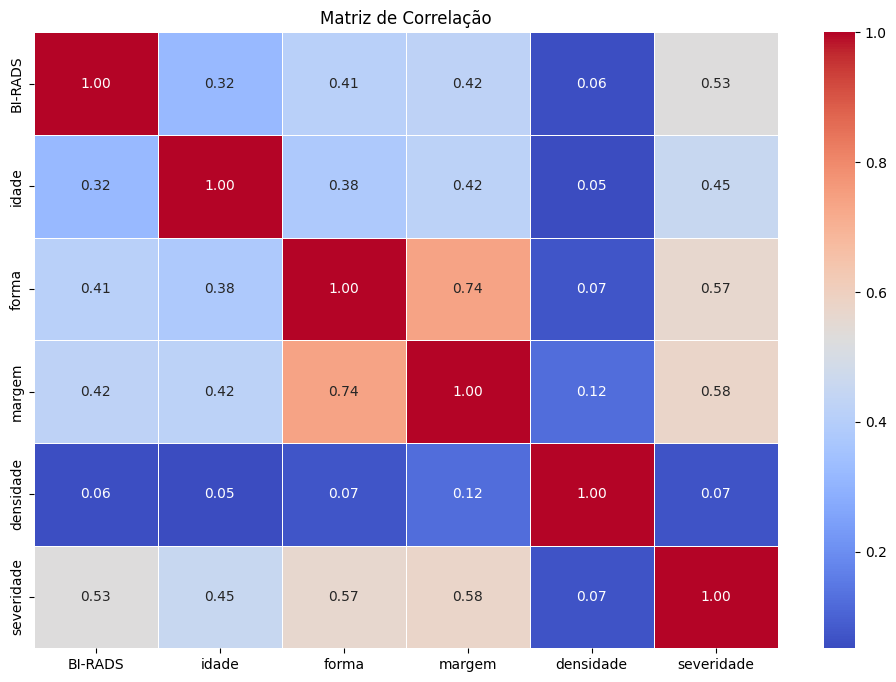

In [ ]:
# Calcular a matriz de correlação
corr_matrix = df.corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


Como parte do pré-processamento dos dados, que irão alimentar o modelo de Machine Learning, vou usar o Backpropagation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def linear_activation(x):
    return x

def normalize(data):
    return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Exemplo de inicialização do pesos de Xavier/Glorot
def initialize_weights(input_size, hidden_size, output_size):
    input_weights = np.random.randn(input_size, hidden_size) * np.sqrt(2 / (input_size + hidden_size))
    output_weights = np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))
    return input_weights, output_weights

def forward_pass(inputs, input_weights, hidden_weights):
    hidden_output = sigmoid(np.dot(inputs, input_weights))
    output = sigmoid(np.dot(hidden_output, hidden_weights))
    return hidden_output, output

def backward_pass(inputs, hidden_output, output, target, input_weights, hidden_weights, learning_rate):
    output_error = target - output
    output_delta = output_error * sigmoid_derivative(output)
    hidden_error = output_delta.dot(hidden_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    hidden_weights += learning_rate * hidden_output.T.dot(output_delta)
    input_weights += learning_rate * inputs.T.dot(hidden_delta)

    return input_weights, hidden_weights

def train_neural_network(inputs, targets, hidden_size, learning_rate, max_epochs, validation_ratio=0.2):
    input_size = inputs.shape[1]
    output_size = targets.shape[1]

    inputs = normalize(inputs)

    train_inputs, val_inputs, train_targets, val_targets = train_test_split(
        inputs, targets, test_size=validation_ratio, random_state=42
    )

    input_weights, hidden_weights = initialize_weights(input_size, hidden_size, output_size)

    training_errors = []
    validation_errors = []

    best_epoch = 0
    best_validation_error = float('inf')

    for epoch in range(1, max_epochs + 1):
        hidden_output, output = forward_pass(train_inputs, input_weights, hidden_weights)
        input_weights, hidden_weights = backward_pass(train_inputs, hidden_output, output, train_targets,
                                                  input_weights, hidden_weights, learning_rate)

        train_predicted = forward_pass(train_inputs, input_weights, hidden_weights)[1]
        training_error = mean_squared_error(train_targets, train_predicted)
        training_errors.append(training_error)

        validation_predicted = forward_pass(val_inputs, input_weights, hidden_weights)[1]
        validation_error = mean_squared_error(val_targets, validation_predicted)
        validation_errors.append(validation_error)

         #Atualiza o melhor desempenho de validação
        if validation_error < best_validation_error:
            best_validation_error = validation_error
            best_epoch = epoch

        # Critério de parada: verifica se o erro de validação atingiu uma melhoria de pelo menos 0.1%
        if epoch > 1 and ((validation_errors[-2] - validation_errors[-1]) / validation_errors[-2]) < 0.001:
          break

  #  plt.plot(range(1, epoch + 1), training_errors, label='Treino')
  #  plt.plot(range(1, epoch + 1), validation_errors, label='Validação')
    plt.plot(range(1, epoch + 1), training_errors, label='Treino', color='blue')
    plt.plot(range(1, epoch + 1), validation_errors, label='Validação', color='green')
    plt.scatter(best_epoch, best_validation_error, edgecolors='green', facecolors='none', marker='o', label='Melhor Desempenho')
    plt.title('Evolução do Erro Médio Quadrático\nMelhor Desempenho na \nÉpoca {} - Erro: {:.4f}'.format(best_epoch, best_validation_error))
    plt.legend()
    plt.xlabel('{} Épocas'.format(best_epoch))
    plt.ylabel('Erro Médio Quadrático')
    plt.hlines(y=best_validation_error, xmin=1, xmax=epoch, color='gray', linestyle='--', label='Melhor')
    plt.text(best_epoch, max(validation_errors), 'Melhor', color='gray', ha='center', va='bottom')

    plt.legend()
    plt.show()


    print(f'Margem de Erro: {best_validation_error - 0.001:.4f} a {best_validation_error + 0.001:.4f}')


    _, val_output = forward_pass(val_inputs, input_weights, hidden_weights)
    predicted_labels = np.round(val_output)

    accuracy = accuracy_score(val_targets, predicted_labels)
    print(f'\n{"*":^15} AVALIAÇÃO DO MODELO \n{"*"*15}')
    print(f'Acurácia do Modelo: {accuracy * 100:.2f}%')
    print(f'{"*"*15}\n')
    return input_weights, hidden_weights

# Leitura dos dados
data = "/content/drive/MyDrive/UFPA/redes_neurais/atividade 1/dados_mamografia.csv"
df = pd.read_csv(data)

# Seleção das colunas relevantes
input_columns = df.columns[1:6]
output_column = df.columns[-1]

inputs = df[input_columns].values
targets = df[output_column].values.reshape(-1, 1)

# Parâmetros do treinamento
hidden_size = 18
learning_rate = 0.001
max_epochs = 2000

# Treinamento da rede neural
input_weights, hidden_weights = train_neural_network(inputs, targets, hidden_size, learning_rate, max_epochs)



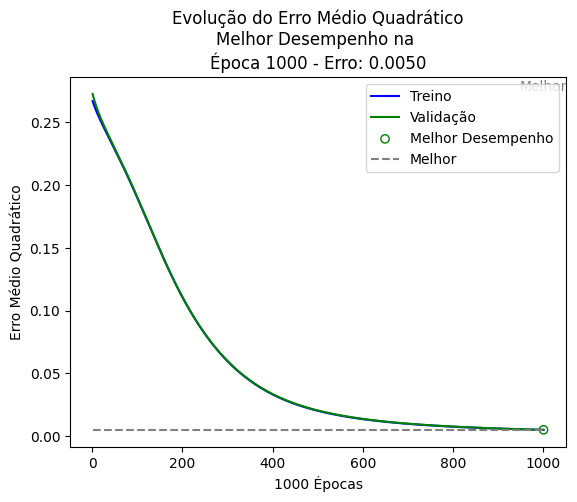

Margem de Erro: 0.0040 a 0.0060

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


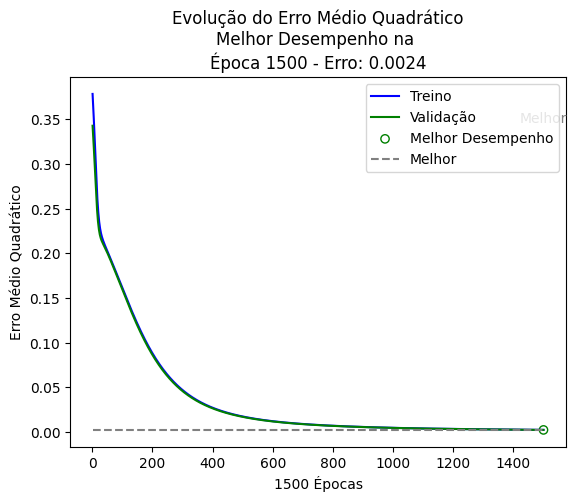

Margem de Erro: 0.0014 a 0.0034

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 47.90%
------------------------------


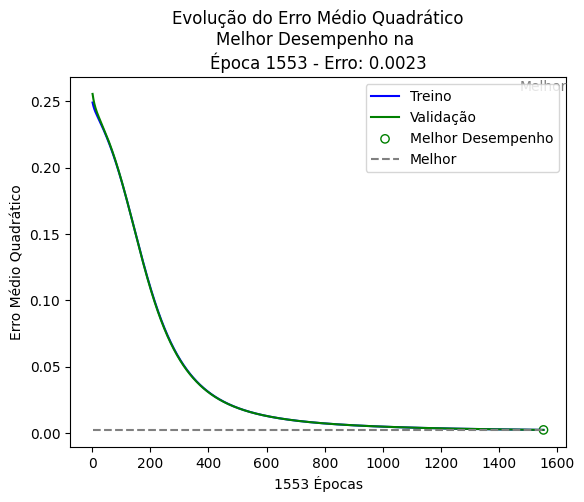

Margem de Erro: 0.0013 a 0.0033

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


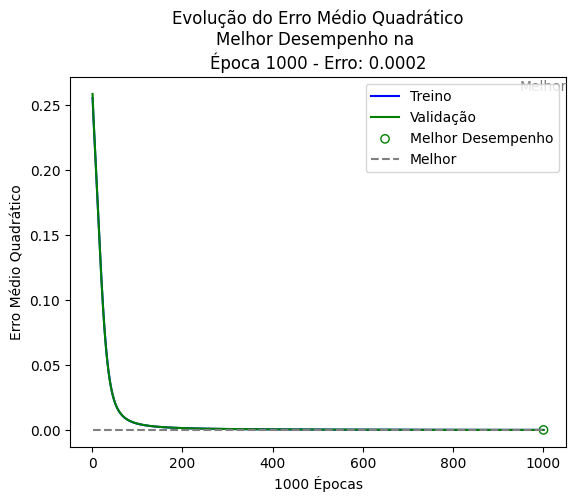

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


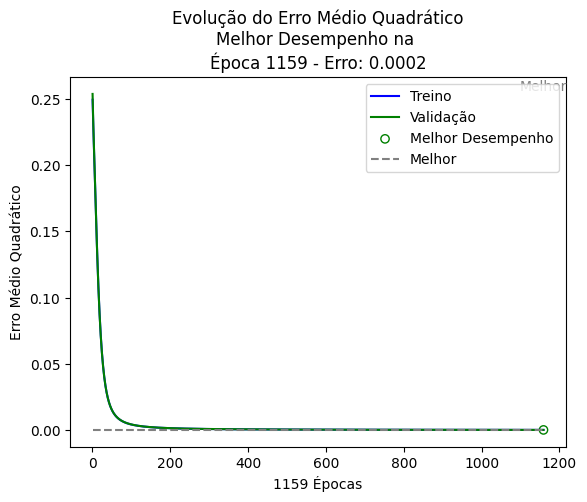

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


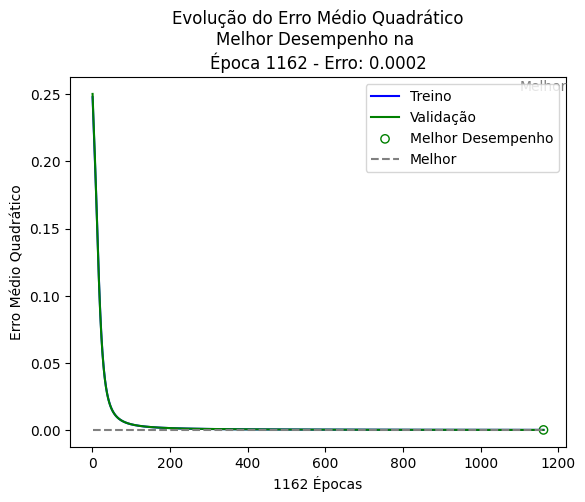

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


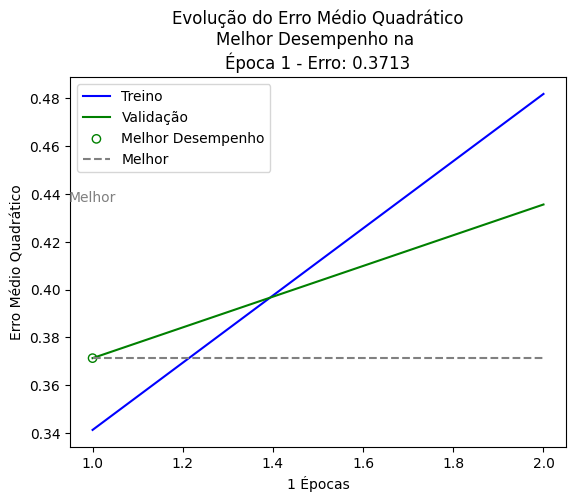

Margem de Erro: 0.3703 a 0.3723

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


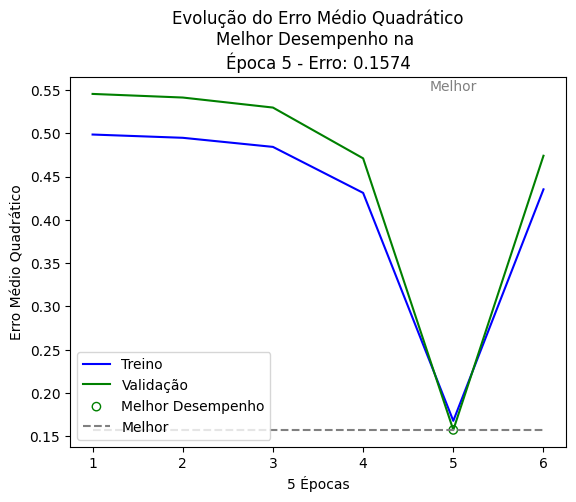

Margem de Erro: 0.1564 a 0.1584

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 47.90%
------------------------------


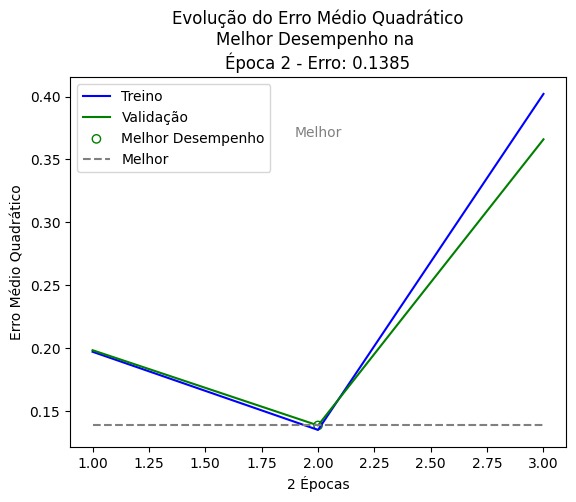

Margem de Erro: 0.1375 a 0.1395

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 10, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


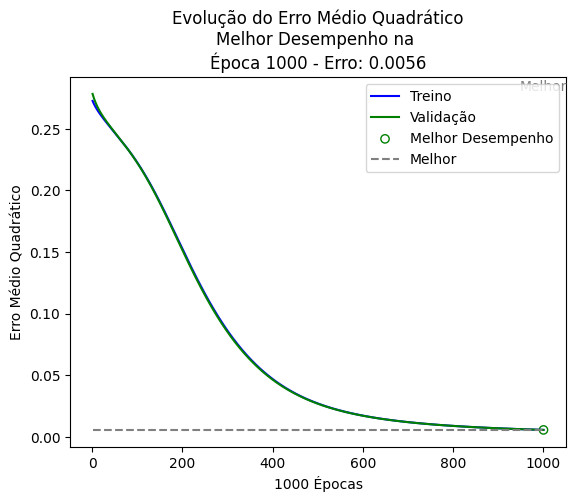

Margem de Erro: 0.0046 a 0.0066

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


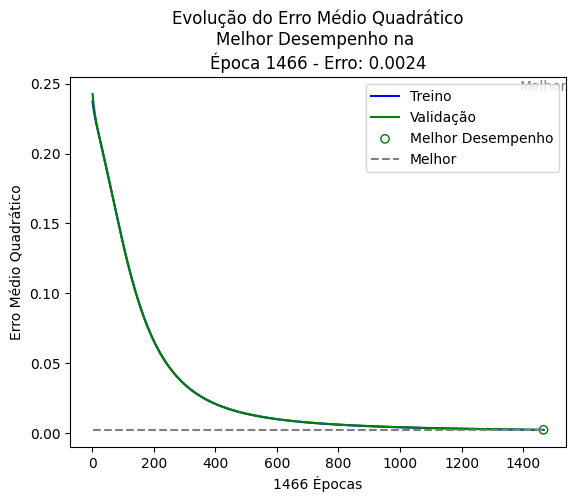

Margem de Erro: 0.0014 a 0.0034

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


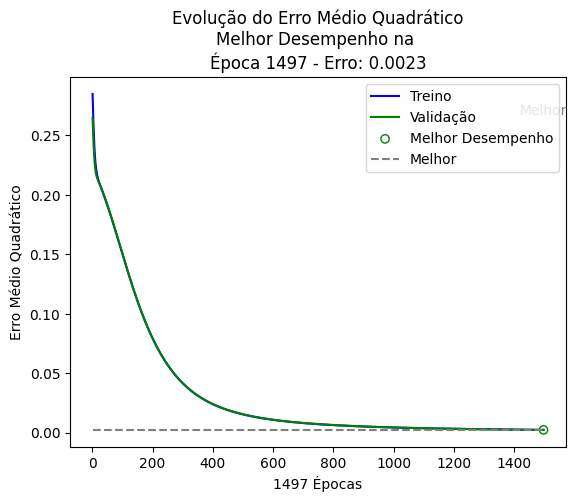

Margem de Erro: 0.0013 a 0.0033

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


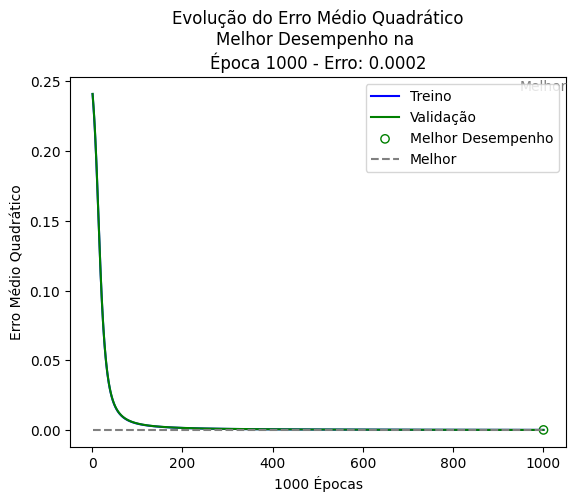

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


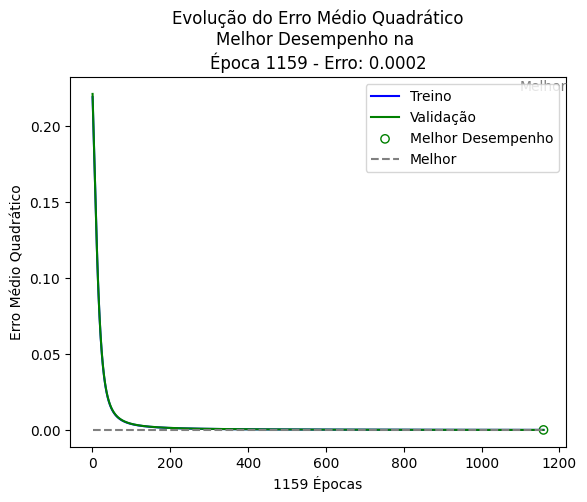

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


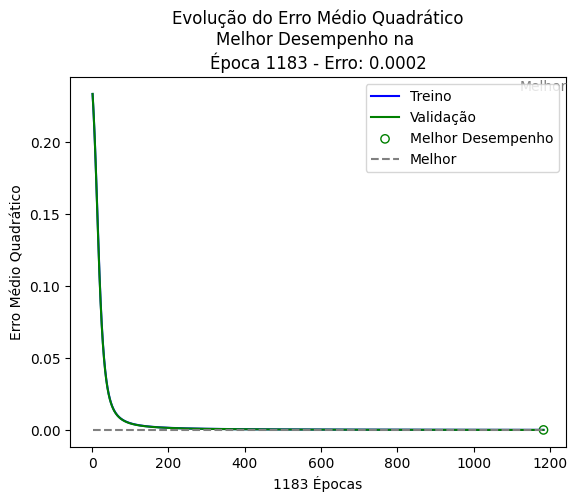

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 95.81%
------------------------------


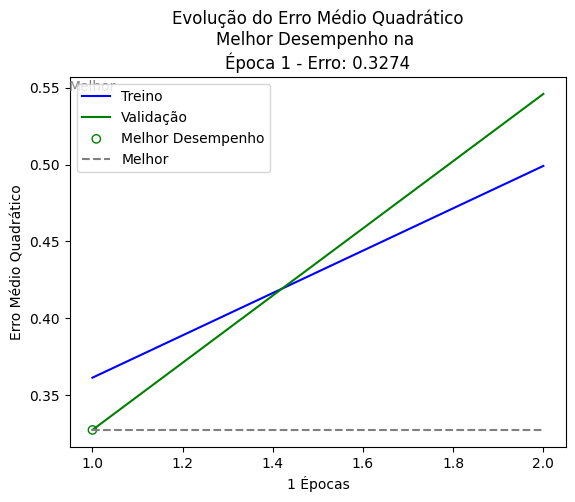

Margem de Erro: 0.3264 a 0.3284

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 47.90%
------------------------------


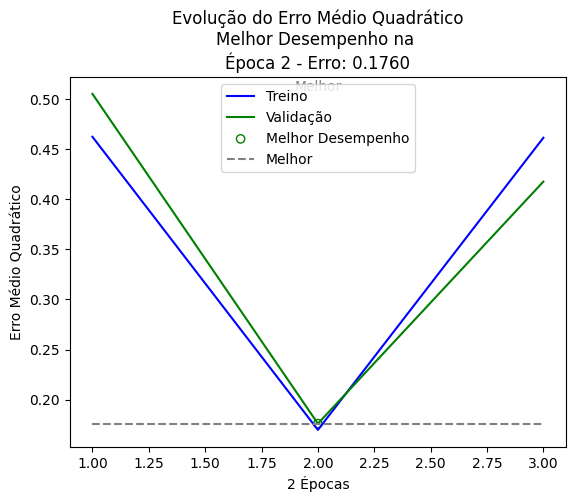

Margem de Erro: 0.1750 a 0.1770

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


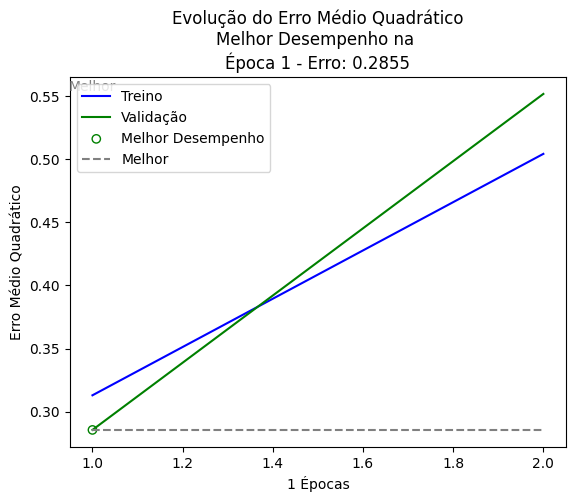

Margem de Erro: 0.2845 a 0.2865

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 11, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


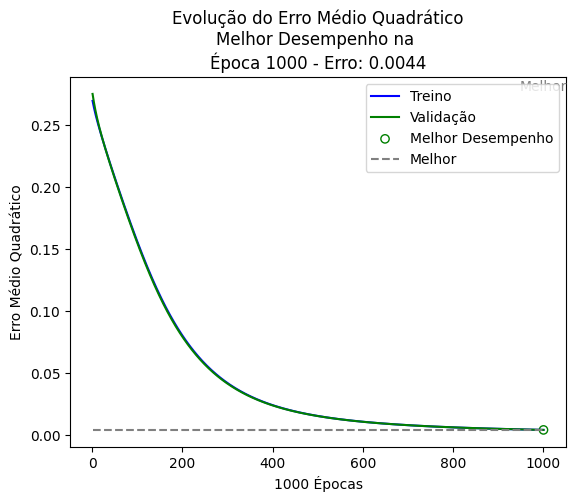

Margem de Erro: 0.0034 a 0.0054

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


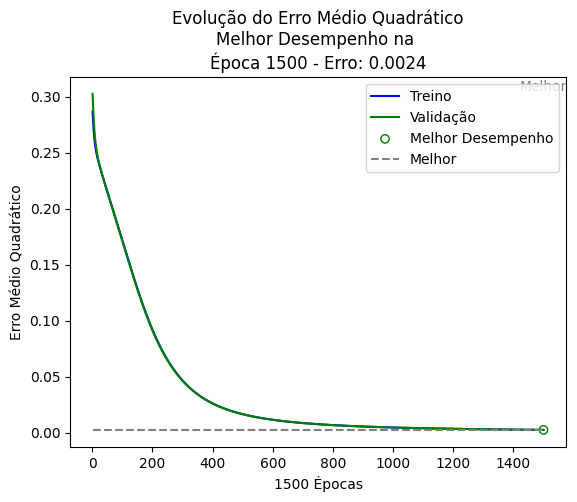

Margem de Erro: 0.0014 a 0.0034

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


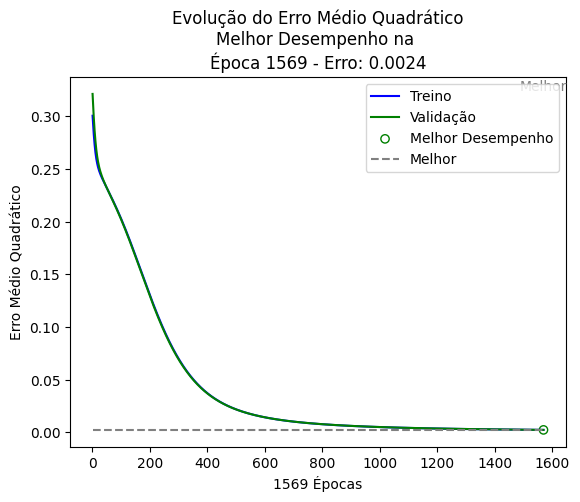

Margem de Erro: 0.0014 a 0.0034

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


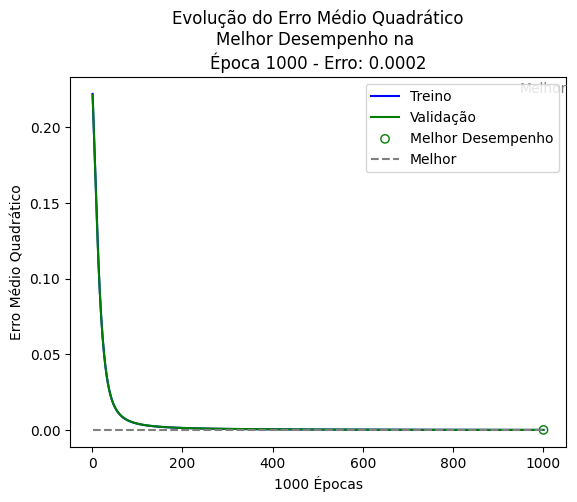

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


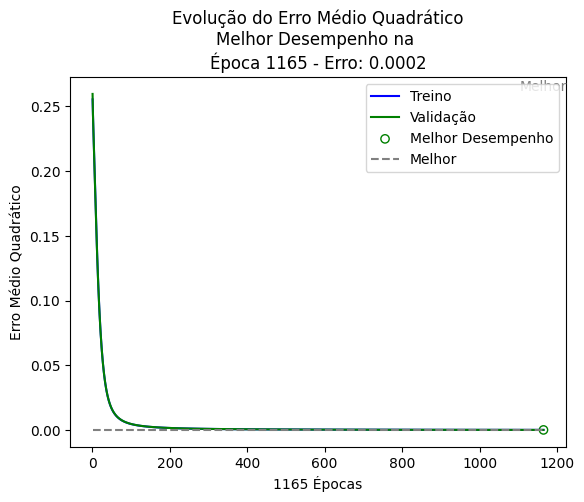

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


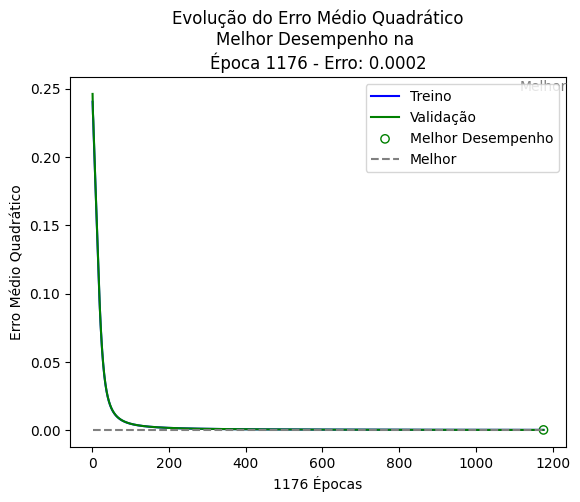

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


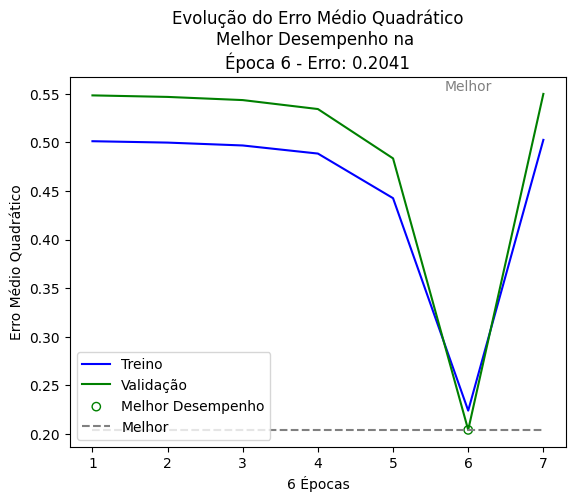

Margem de Erro: 0.2031 a 0.2051

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 47.90%
------------------------------


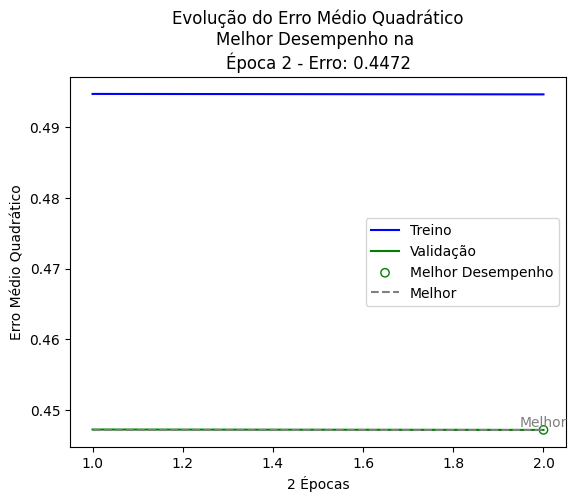

Margem de Erro: 0.4462 a 0.4482

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


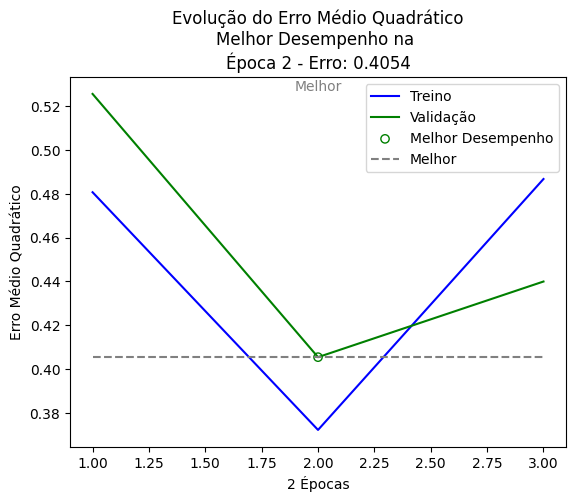

Margem de Erro: 0.4044 a 0.4064

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 12, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


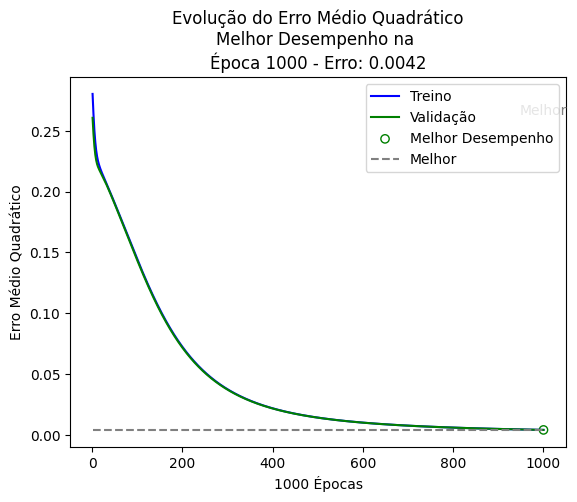

Margem de Erro: 0.0032 a 0.0052

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 53.89%
------------------------------


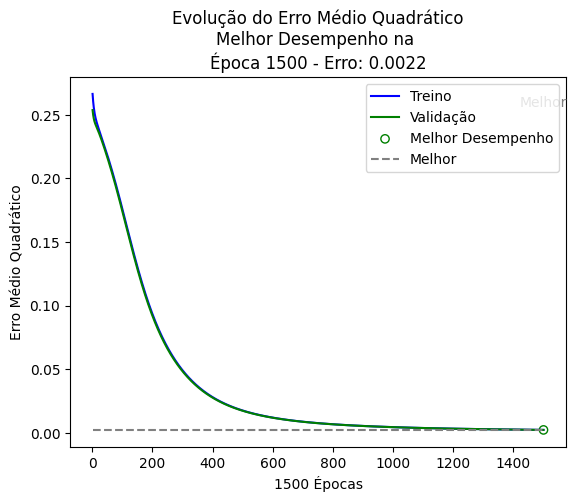

Margem de Erro: 0.0012 a 0.0032

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


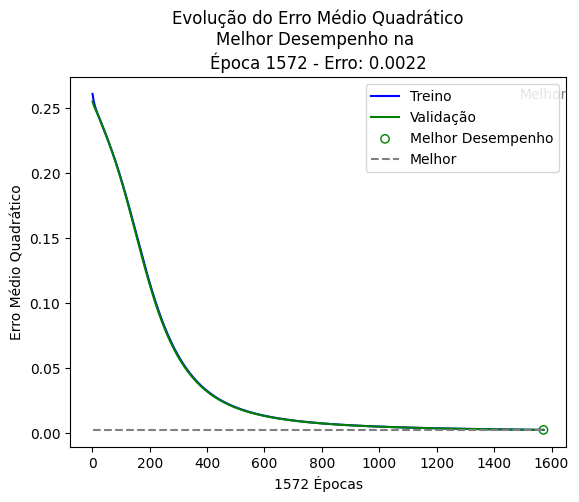

Margem de Erro: 0.0012 a 0.0032

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


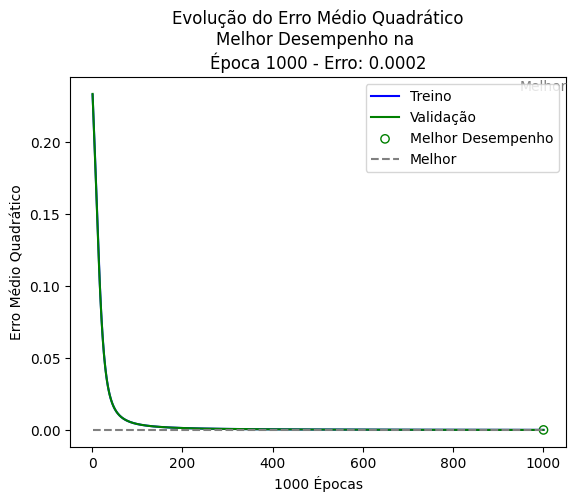

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


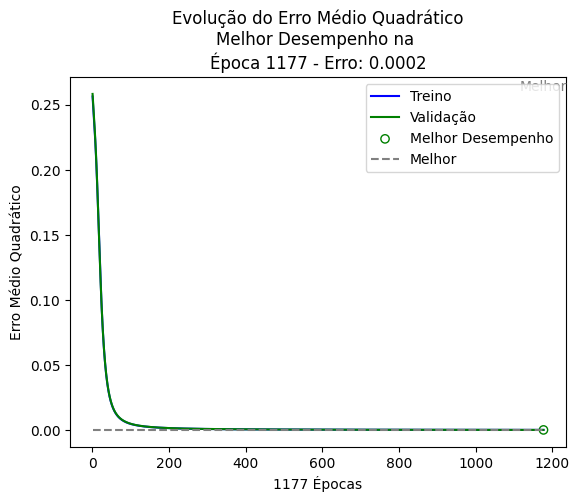

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


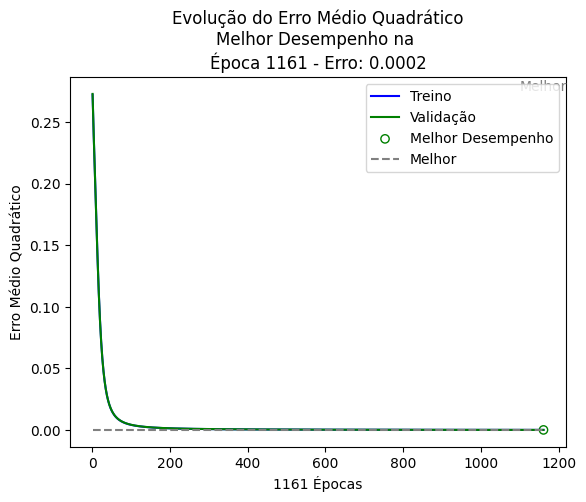

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


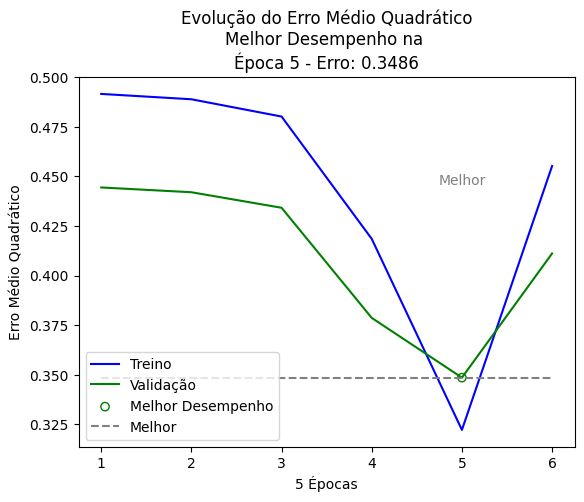

Margem de Erro: 0.3476 a 0.3496

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


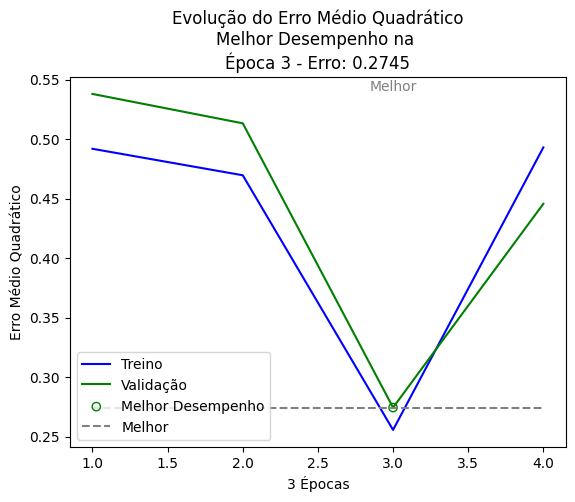

Margem de Erro: 0.2735 a 0.2755

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


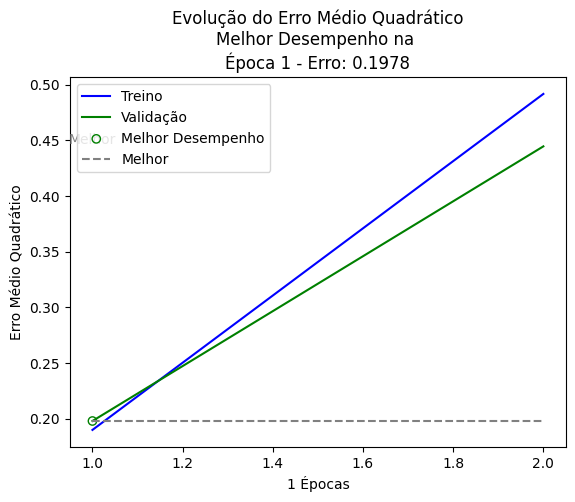

Margem de Erro: 0.1968 a 0.1988

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 13, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


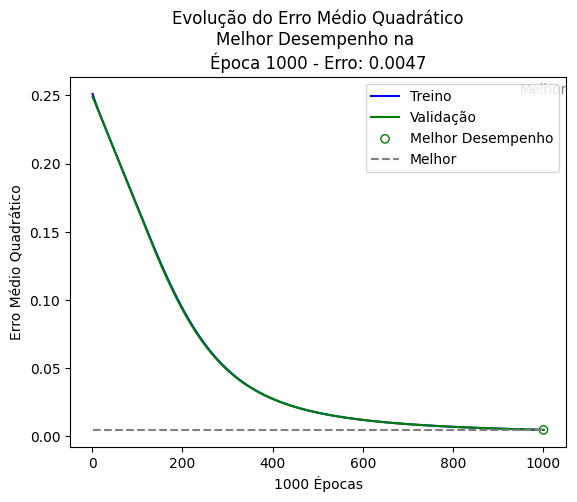

Margem de Erro: 0.0037 a 0.0057

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


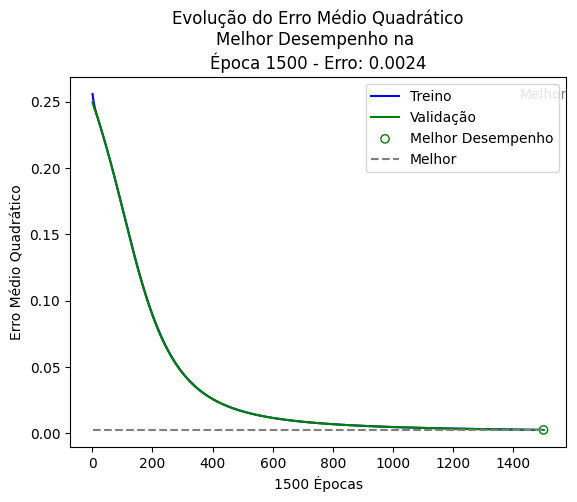

Margem de Erro: 0.0014 a 0.0034

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


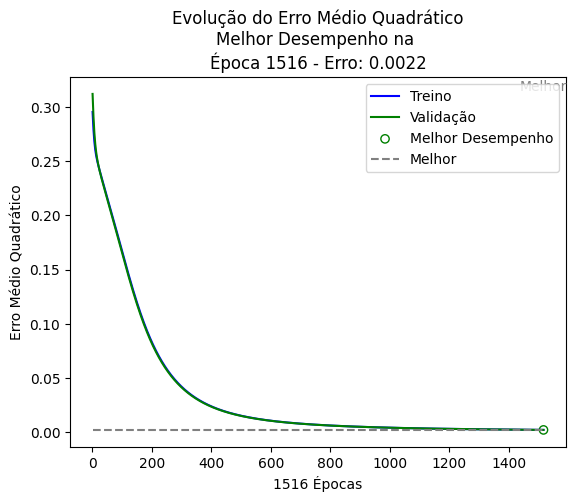

Margem de Erro: 0.0012 a 0.0032

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 53.89%
------------------------------


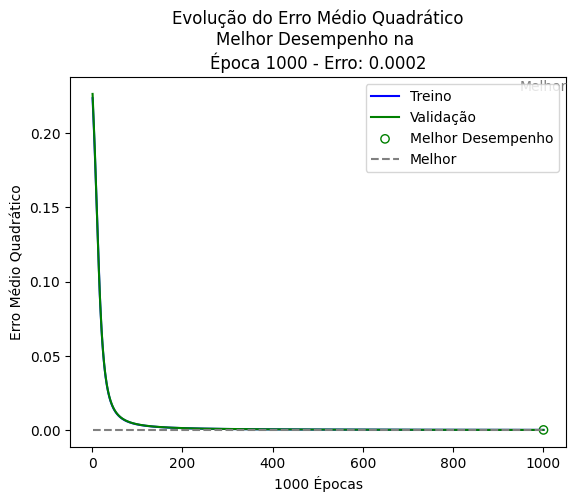

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


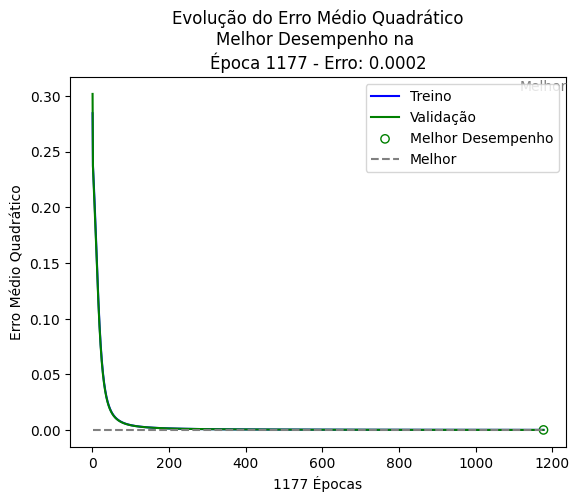

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


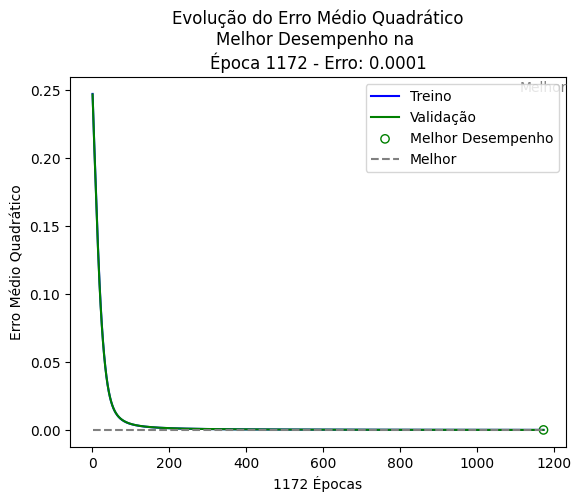

Margem de Erro: -0.0009 a 0.0011

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


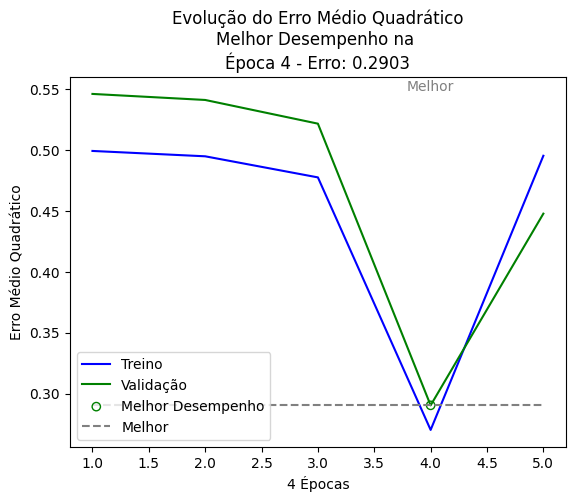

Margem de Erro: 0.2893 a 0.2913

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


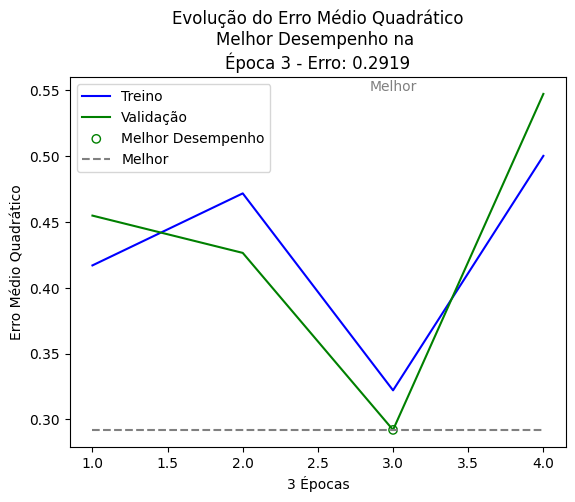

Margem de Erro: 0.2909 a 0.2929

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 47.90%
------------------------------


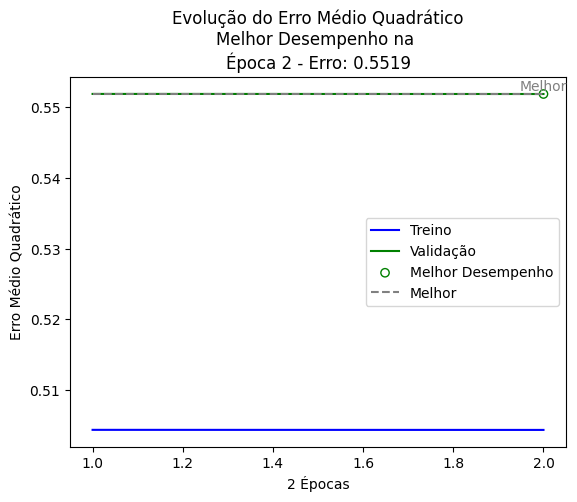

Margem de Erro: 0.5509 a 0.5529

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 14, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


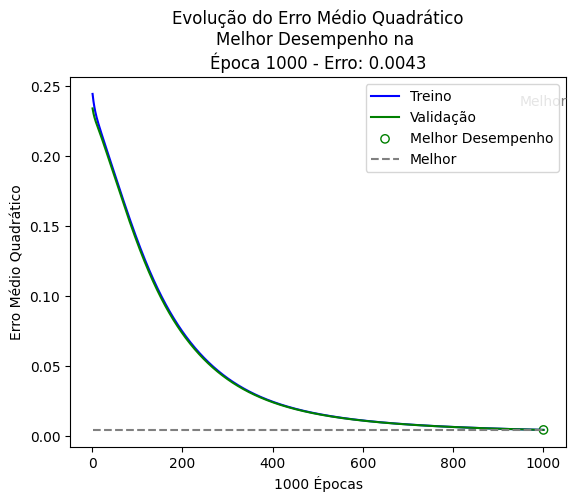

Margem de Erro: 0.0033 a 0.0053

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


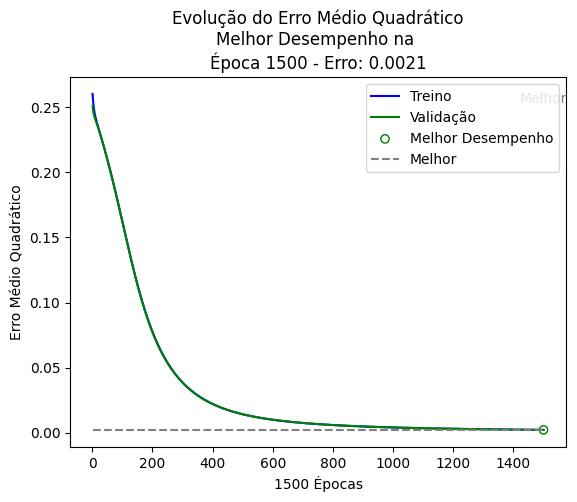

Margem de Erro: 0.0011 a 0.0031

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


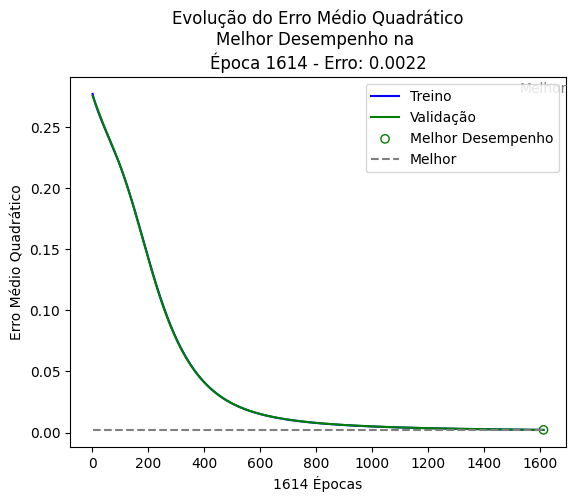

Margem de Erro: 0.0012 a 0.0032

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


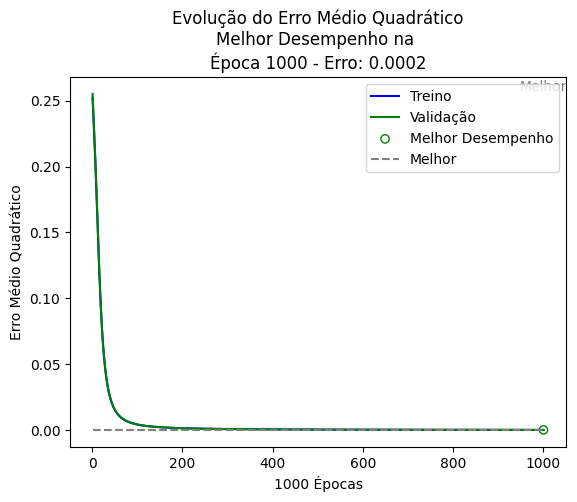

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


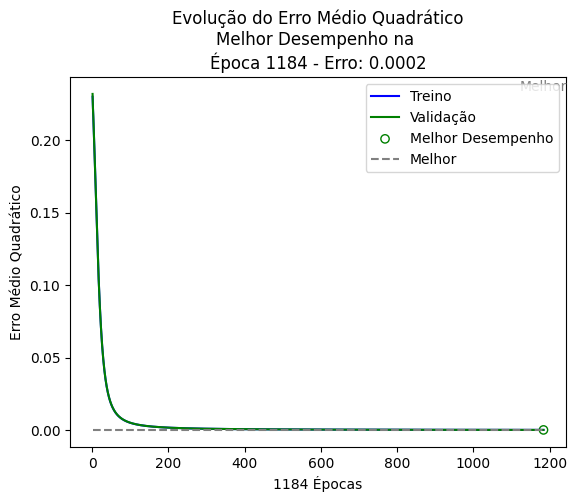

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


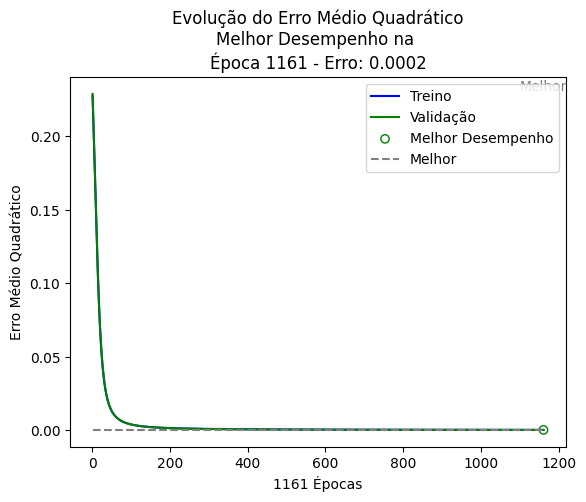

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


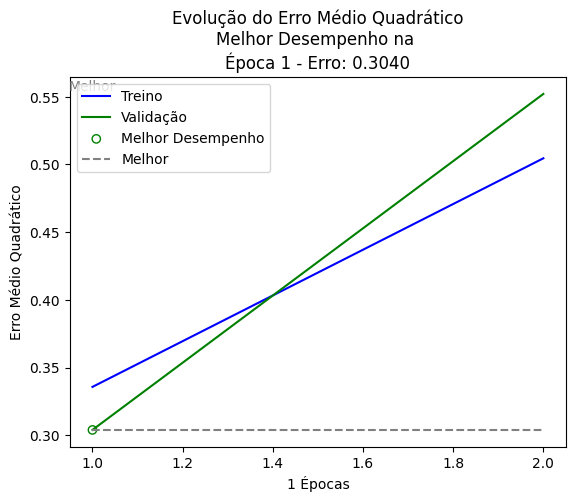

Margem de Erro: 0.3030 a 0.3050

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 47.90%
------------------------------


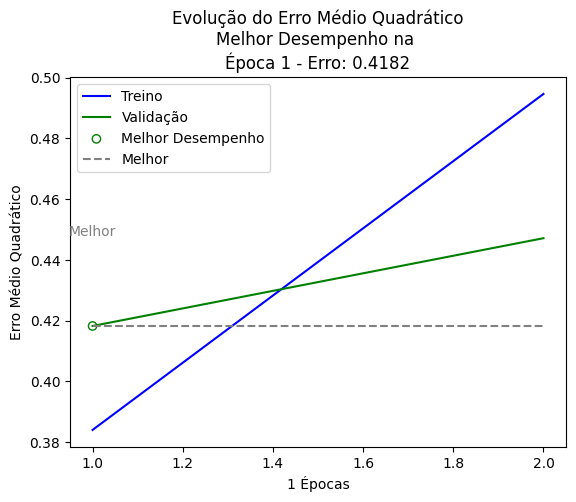

Margem de Erro: 0.4172 a 0.4192

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


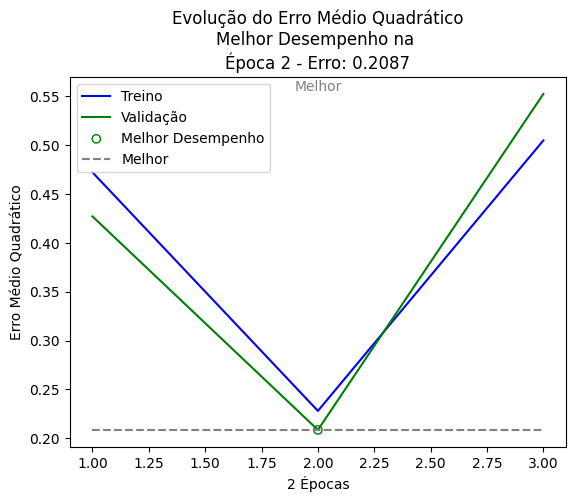

Margem de Erro: 0.2077 a 0.2097

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 15, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


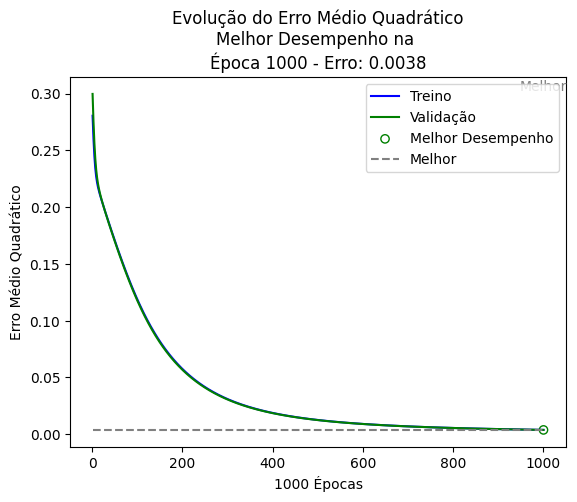

Margem de Erro: 0.0028 a 0.0048

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 71.26%
------------------------------


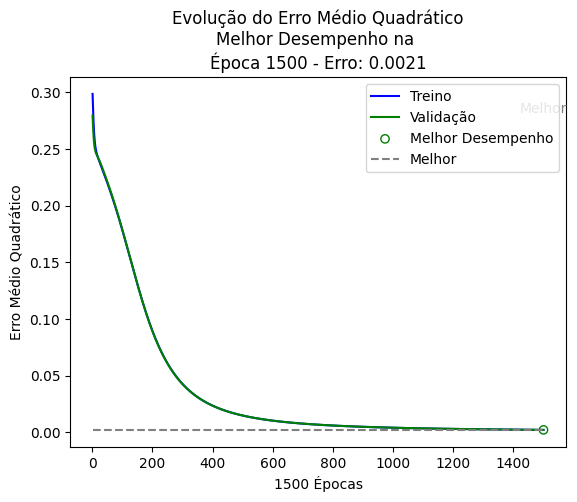

Margem de Erro: 0.0011 a 0.0031

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


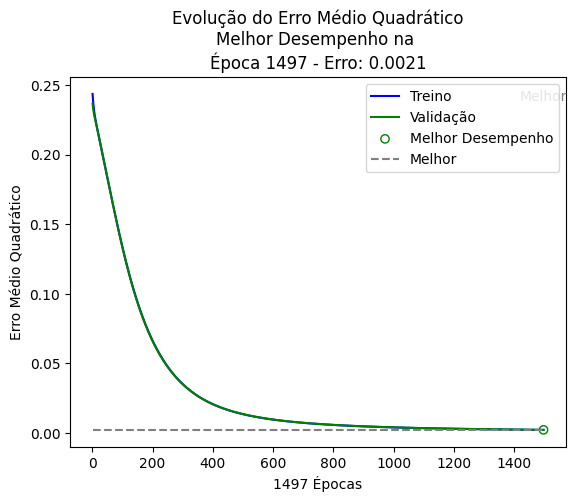

Margem de Erro: 0.0011 a 0.0031

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


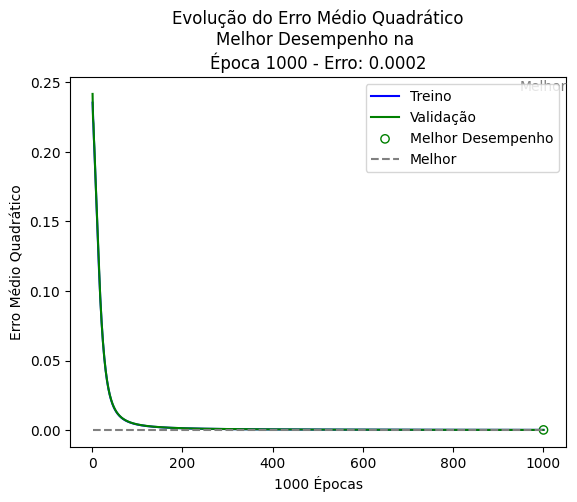

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


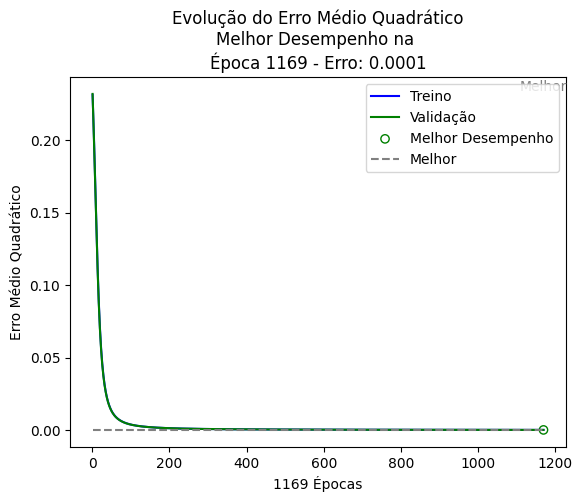

Margem de Erro: -0.0009 a 0.0011

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 95.81%
------------------------------


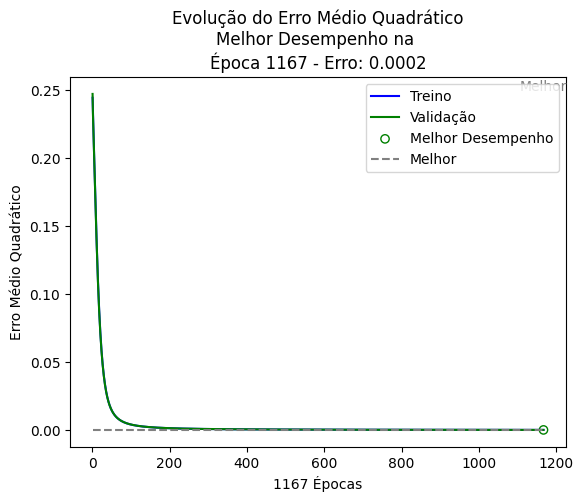

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


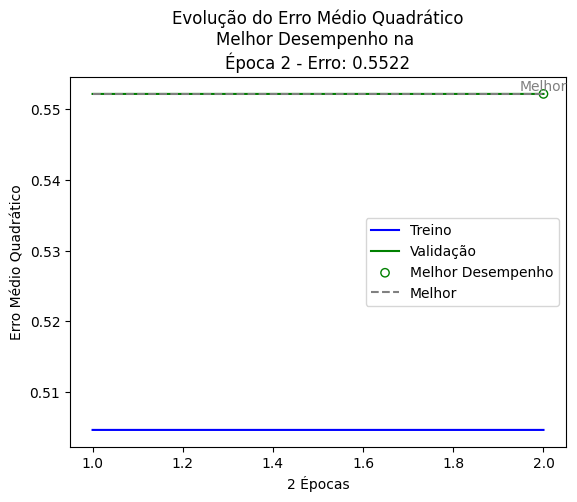

Margem de Erro: 0.5512 a 0.5532

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 47.90%
------------------------------


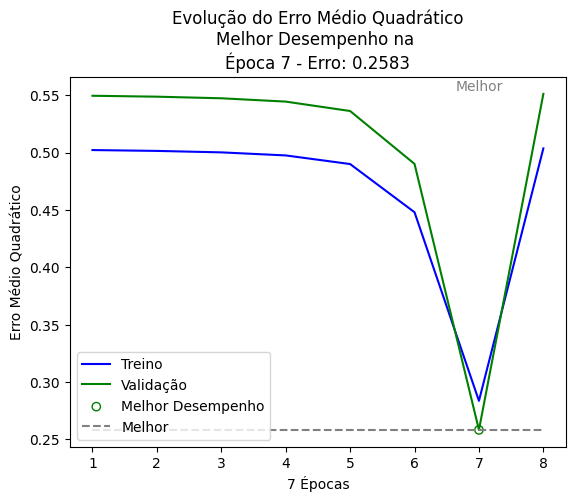

Margem de Erro: 0.2573 a 0.2593

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 47.90%
------------------------------


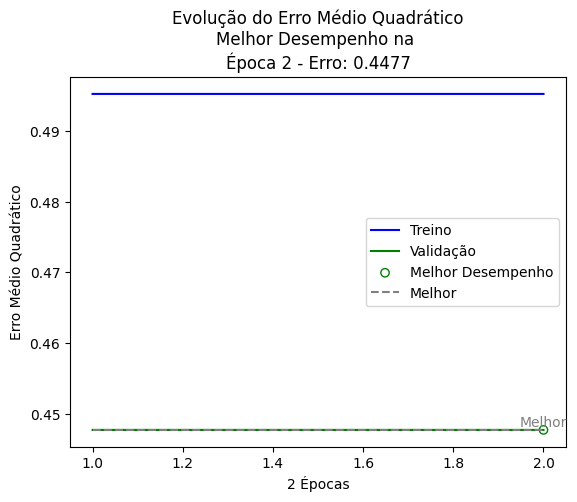

Margem de Erro: 0.4467 a 0.4487

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 16, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


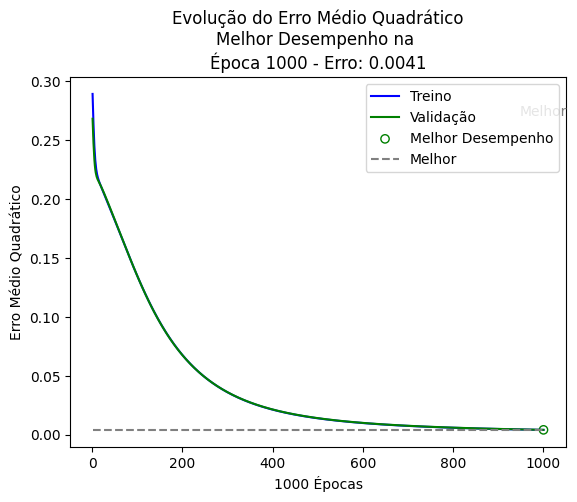

Margem de Erro: 0.0031 a 0.0051

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


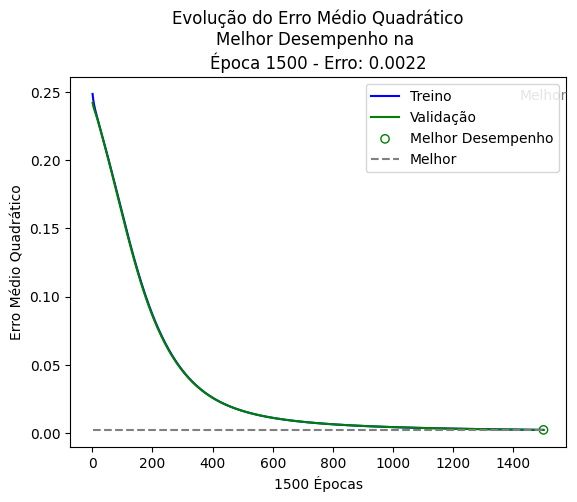

Margem de Erro: 0.0012 a 0.0032

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


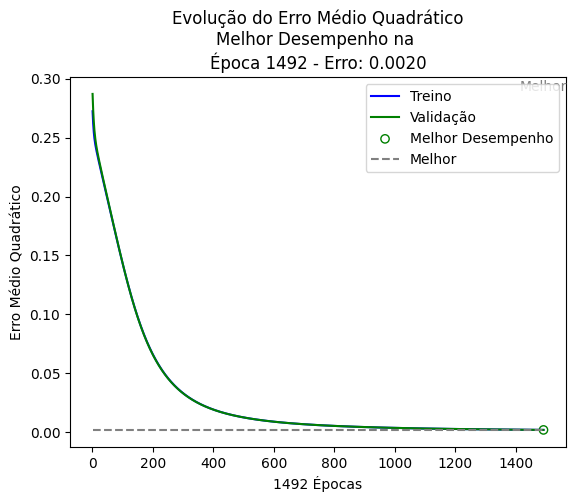

Margem de Erro: 0.0010 a 0.0030

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


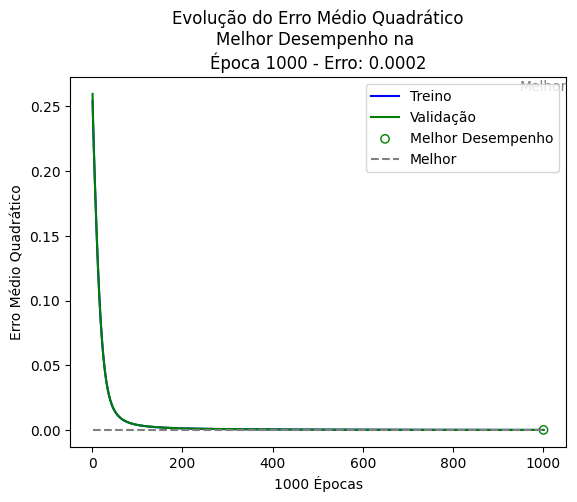

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


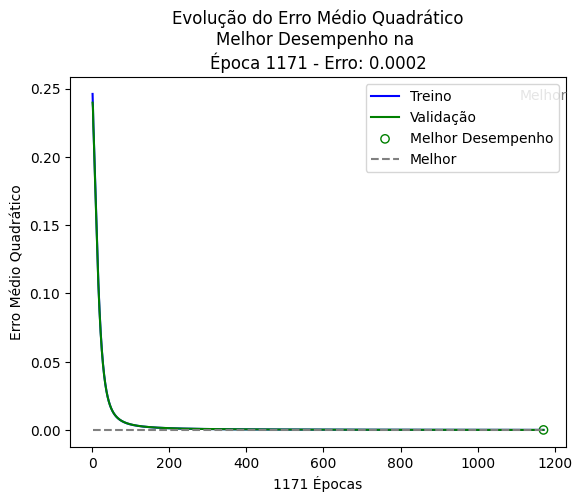

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


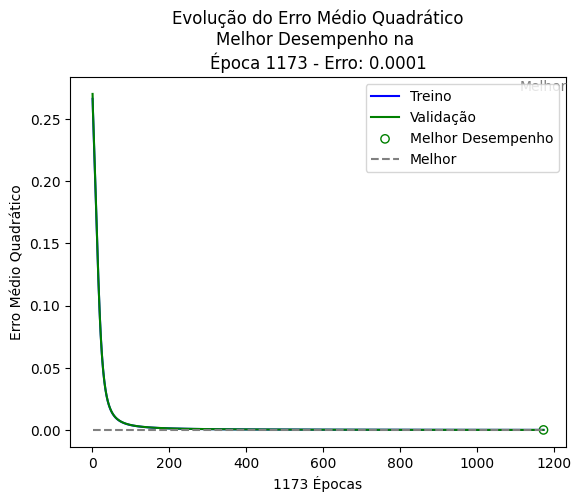

Margem de Erro: -0.0009 a 0.0011

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


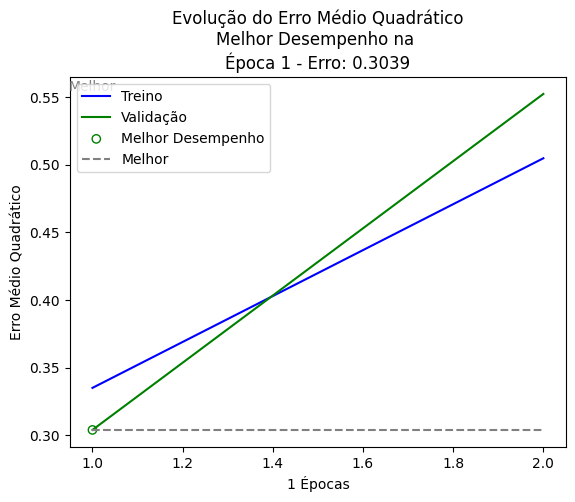

Margem de Erro: 0.3029 a 0.3049

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 47.90%
------------------------------


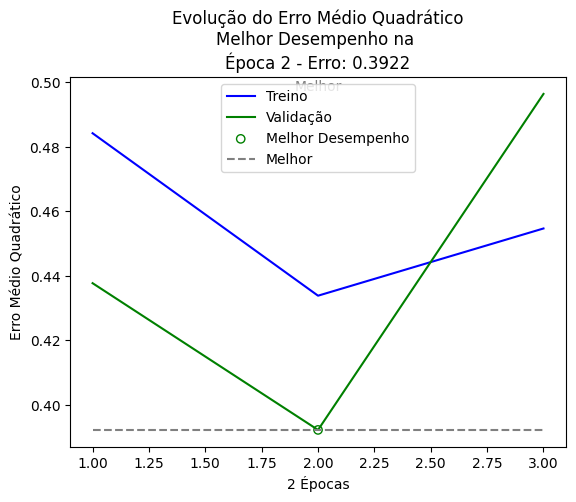

Margem de Erro: 0.3912 a 0.3932

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 47.90%
------------------------------


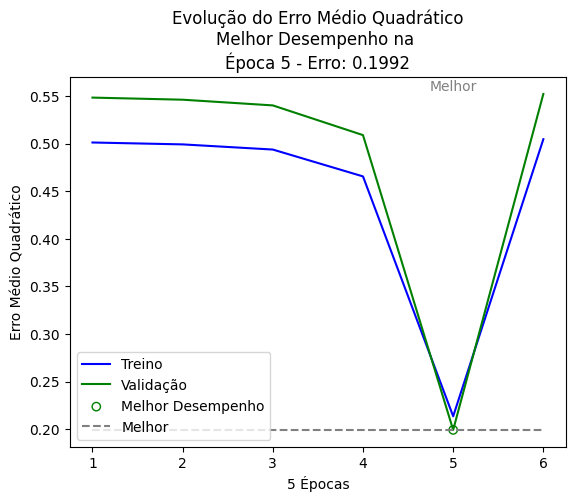

Margem de Erro: 0.1982 a 0.2002

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 17, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


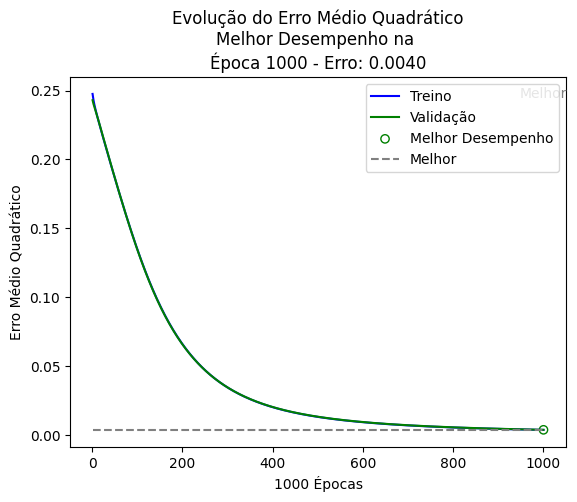

Margem de Erro: 0.0030 a 0.0050

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


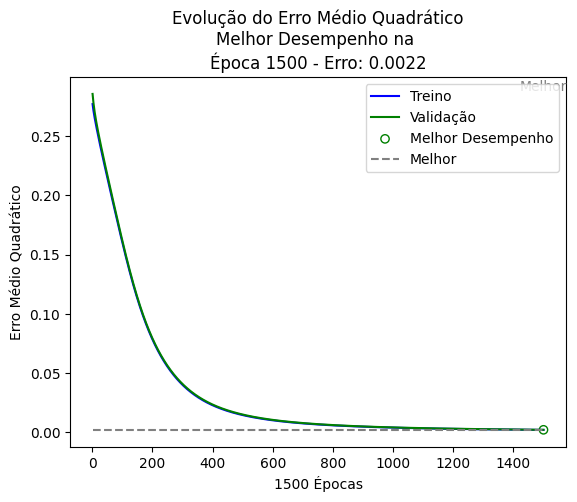

Margem de Erro: 0.0012 a 0.0032

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


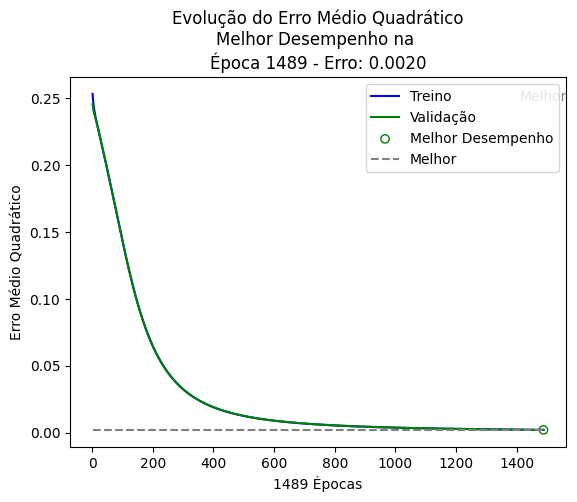

Margem de Erro: 0.0010 a 0.0030

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 89.82%
------------------------------


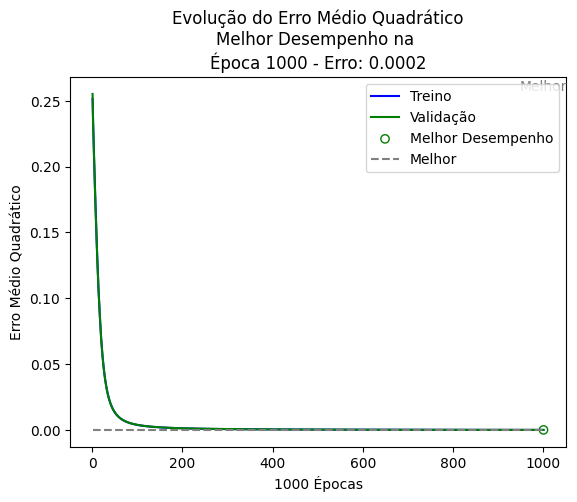

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


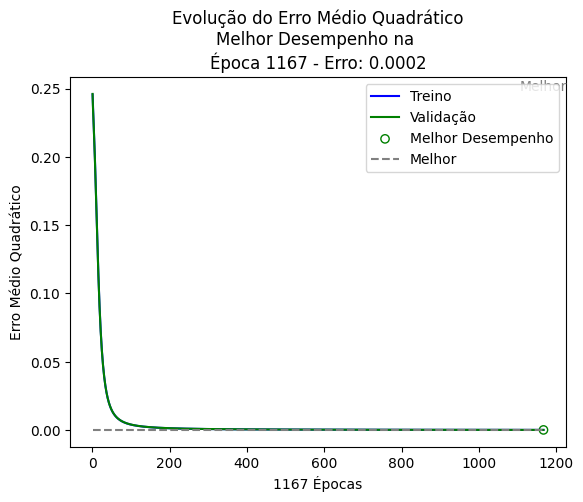

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


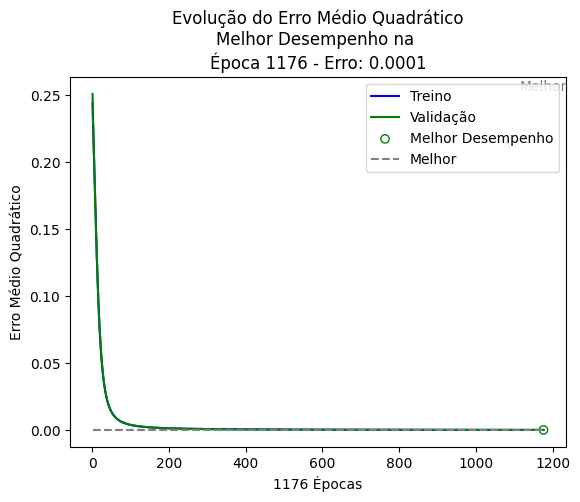

Margem de Erro: -0.0009 a 0.0011

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


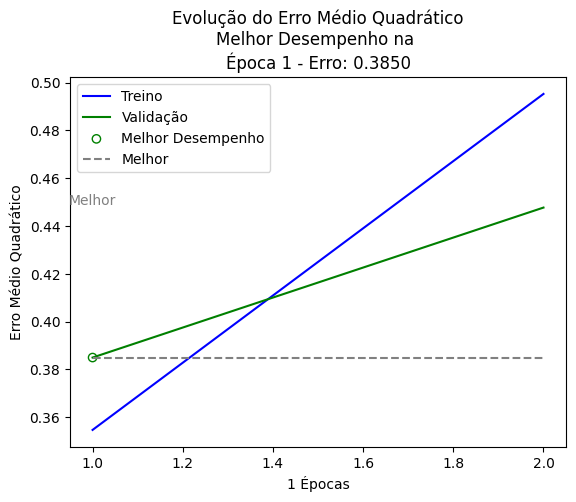

Margem de Erro: 0.3840 a 0.3860

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


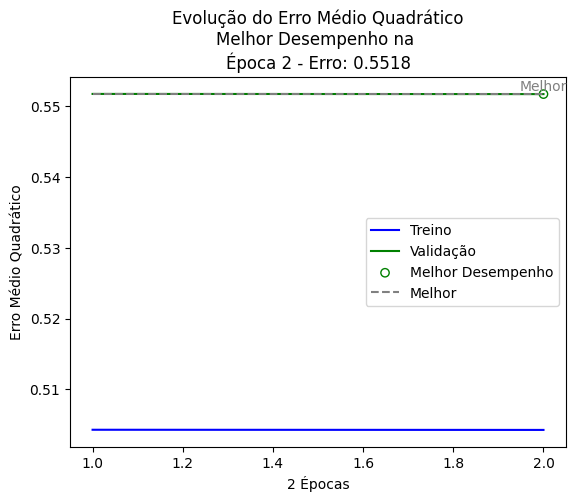

Margem de Erro: 0.5508 a 0.5528

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 47.90%
------------------------------


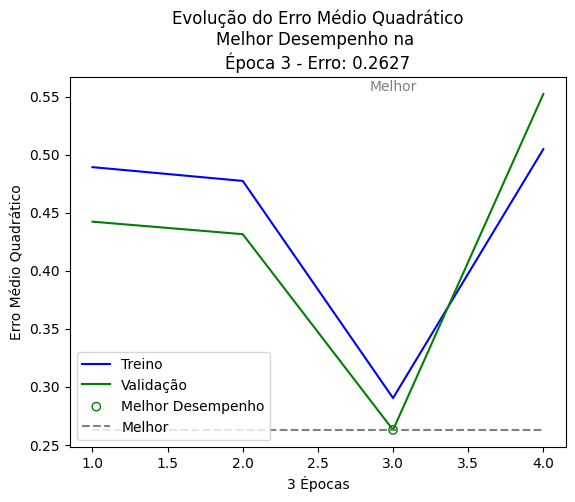

Margem de Erro: 0.2617 a 0.2637

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 18, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


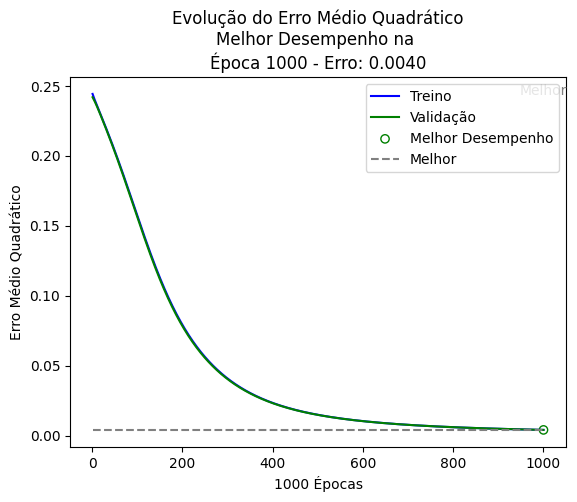

Margem de Erro: 0.0030 a 0.0050

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 87.43%
------------------------------


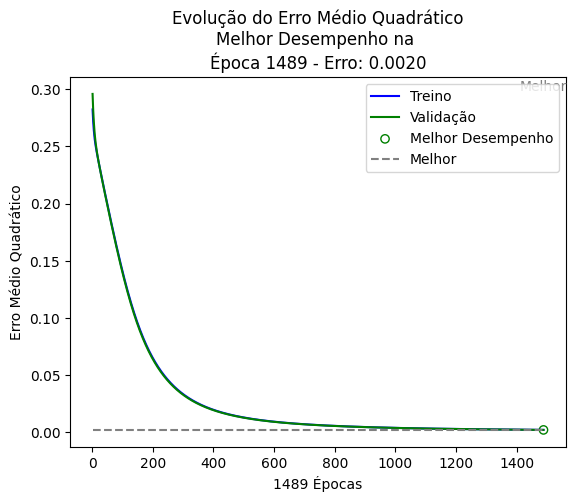

Margem de Erro: 0.0010 a 0.0030

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


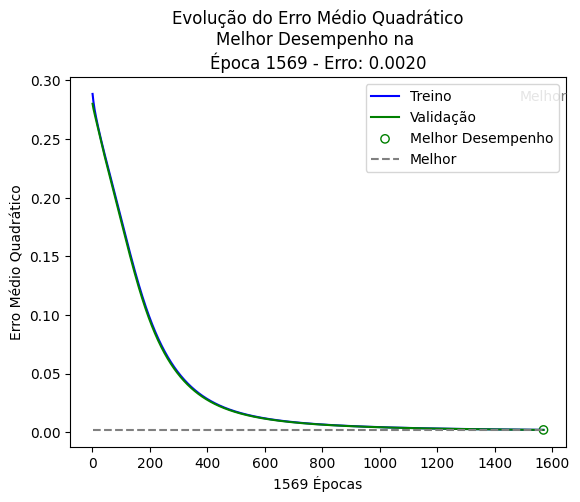

Margem de Erro: 0.0010 a 0.0030

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


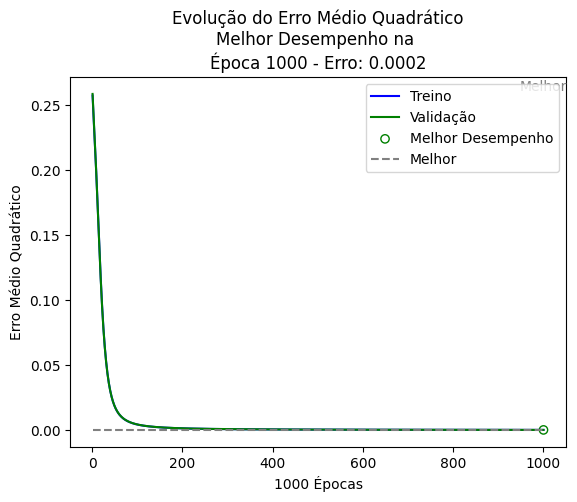

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


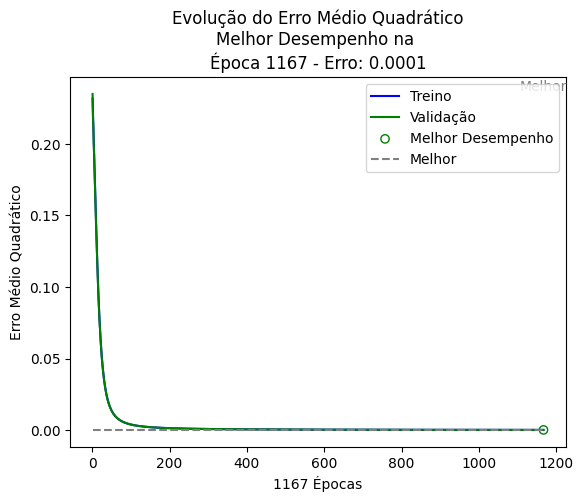

Margem de Erro: -0.0009 a 0.0011

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


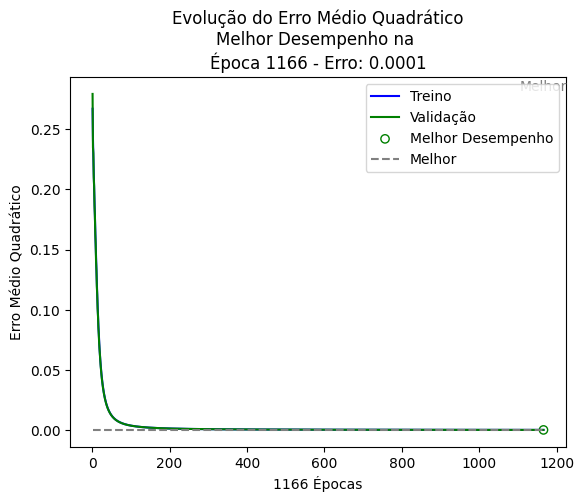

Margem de Erro: -0.0009 a 0.0011

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


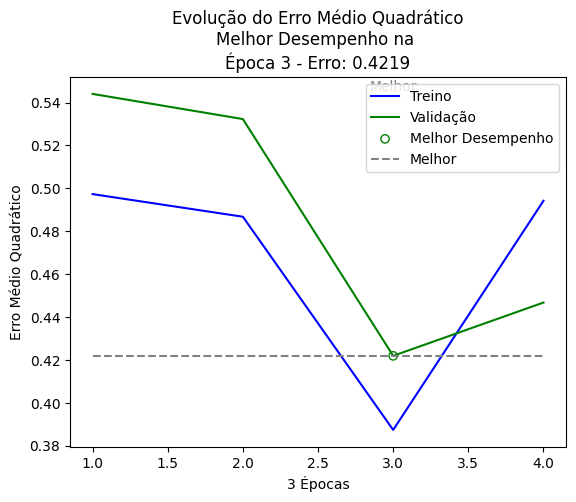

Margem de Erro: 0.4209 a 0.4229

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


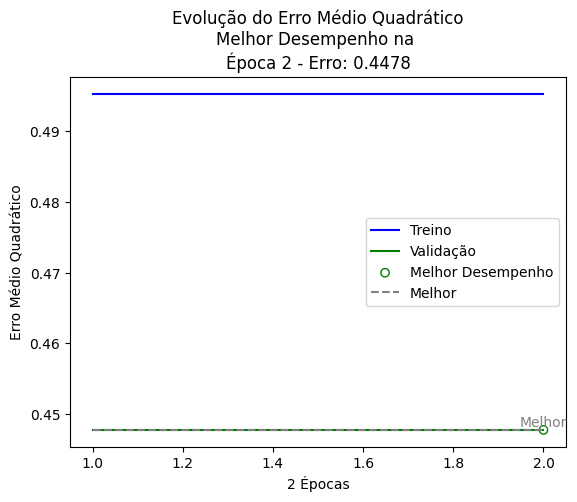

Margem de Erro: 0.4468 a 0.4488

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


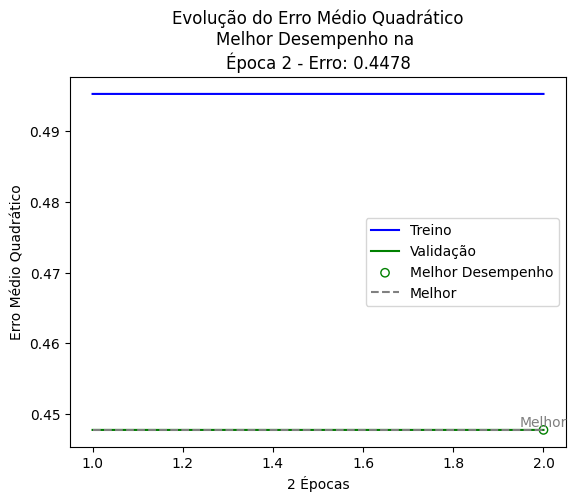

Margem de Erro: 0.4468 a 0.4488

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 19, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


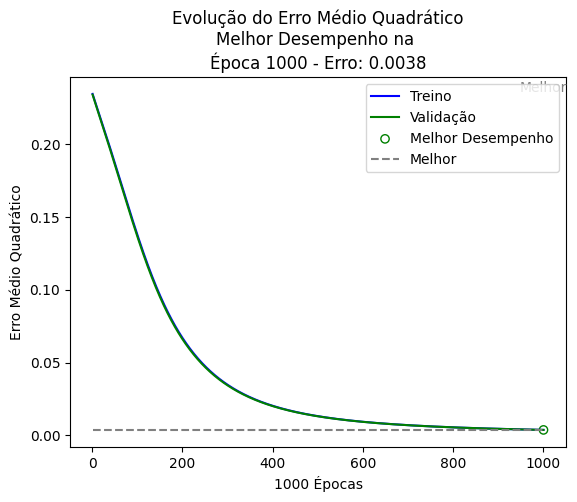

Margem de Erro: 0.0028 a 0.0048

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1000
Acurácia: 94.01%
------------------------------


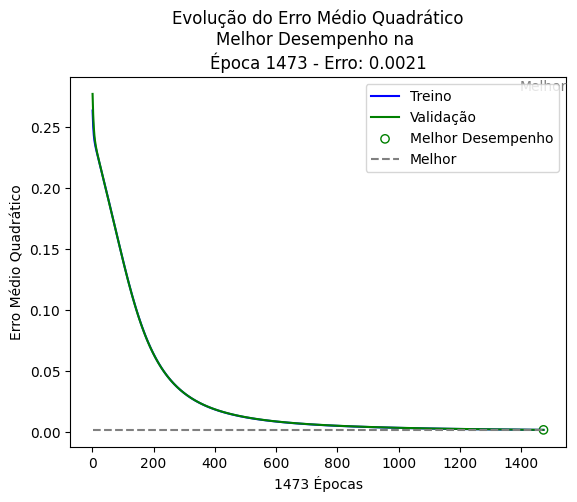

Margem de Erro: 0.0011 a 0.0031

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


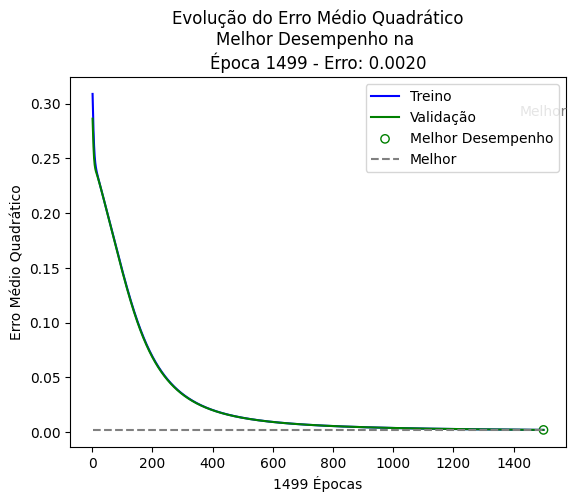

Margem de Erro: 0.0010 a 0.0030

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.001, Número Máximo de Épocas: 2000
Acurácia: 52.10%
------------------------------


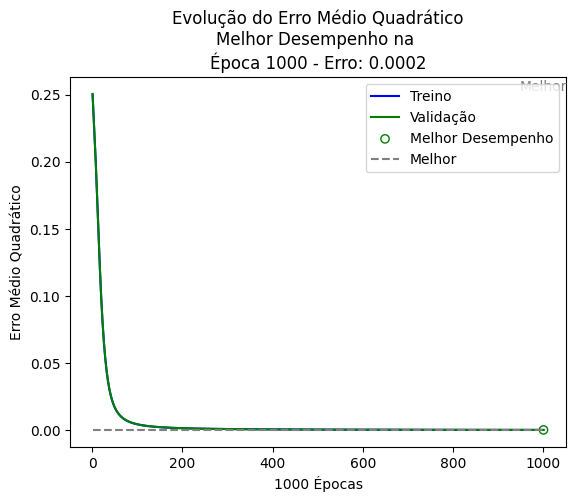

Margem de Erro: -0.0008 a 0.0012

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 100.00%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1000
Acurácia: 52.10%
------------------------------


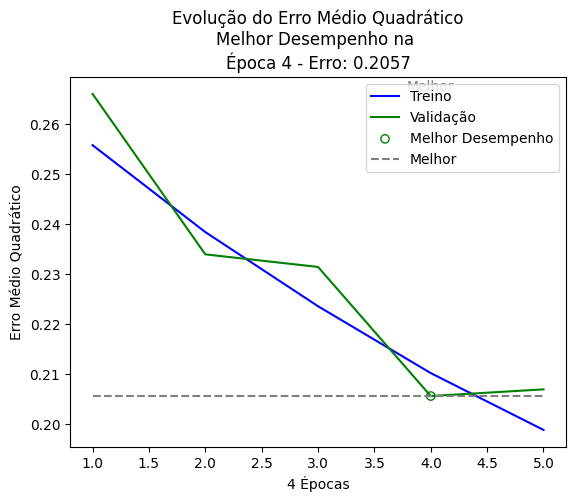

Margem de Erro: 0.2047 a 0.2067

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


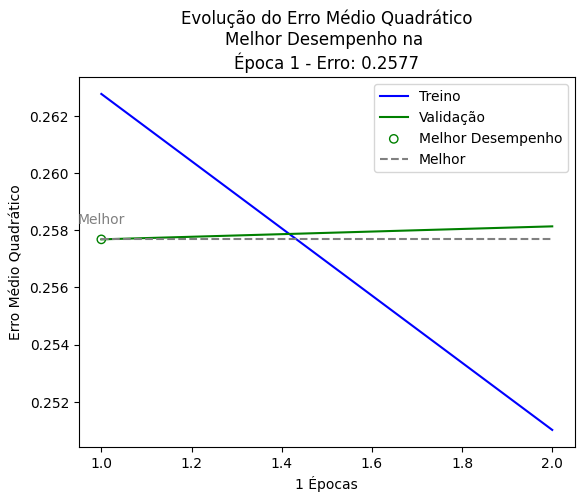

Margem de Erro: 0.2567 a 0.2587

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.01, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------


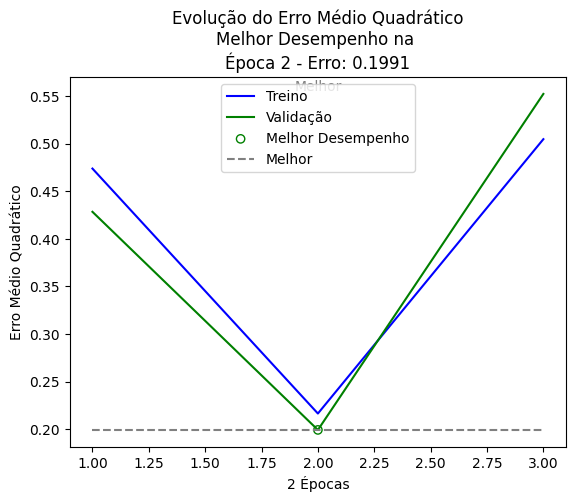

Margem de Erro: 0.1981 a 0.2001

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1000
Acurácia: 47.90%
------------------------------


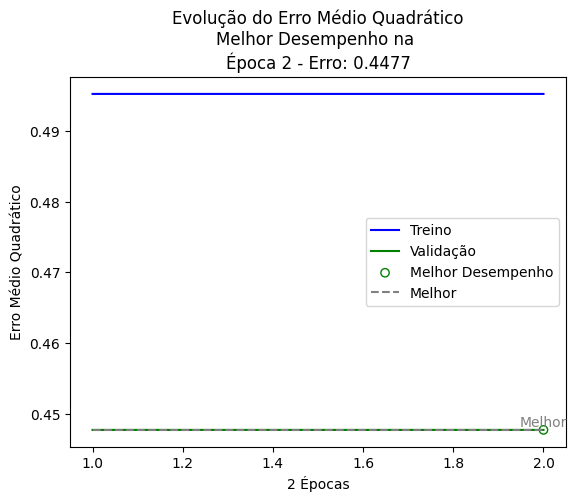

Margem de Erro: 0.4467 a 0.4487

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 55.22%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 1500
Acurácia: 52.10%
------------------------------


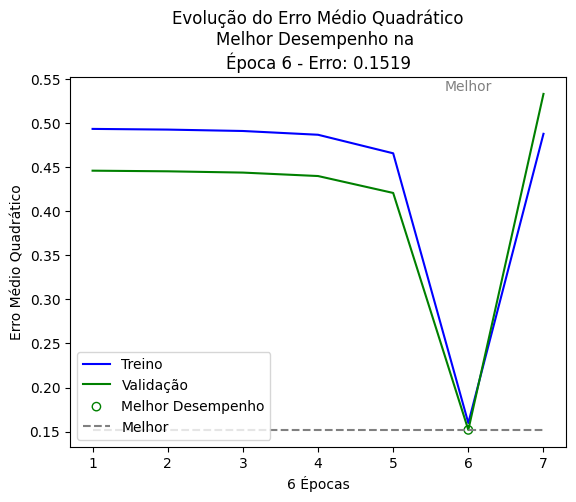

Margem de Erro: 0.1509 a 0.1529

       *        AVALIAÇÃO DO MODELO 
***************
Acurácia do Modelo: 44.78%
***************

Tamanho da Camada Oculta: 20, Taxa de Aprendizado: 0.1, Número Máximo de Épocas: 2000
Acurácia: 47.90%
------------------------------
Melhor Acurácia: 89.82% com Tamanho Oculto: 18


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def linear_activation(x):
    return x

def normalizar(dados):
    return (dados - dados.min(axis=0)) / (dados.max(axis=0) - dados.min(axis=0))

def inicializar_pesos(tamanho_entrada, tamanho_oculto, tamanho_saida):
    pesos_entrada = np.random.randn(tamanho_entrada, tamanho_oculto) * np.sqrt(2 / (tamanho_entrada + tamanho_oculto))
    pesos_saida = np.random.randn(tamanho_oculto, tamanho_saida) * np.sqrt(2 / (tamanho_oculto + tamanho_saida))
    return pesos_entrada, pesos_saida

def passagem_frente(entradas, pesos_entrada, pesos_ocultos):
    saida_oculta = sigmoid(np.dot(entradas, pesos_entrada))
    saida = sigmoid(np.dot(saida_oculta, pesos_ocultos))
    return saida_oculta, saida

def backprogation(entradas, saida_oculta, saida, alvo, pesos_entrada, pesos_ocultos, taxa_aprendizado):
    erro_saida = alvo - saida
    delta_saida = erro_saida * sigmoid_derivative(saida)
    erro_oculto = delta_saida.dot(pesos_ocultos.T)
    delta_oculto = erro_oculto * sigmoid_derivative(saida_oculta)

    pesos_ocultos += taxa_aprendizado * saida_oculta.T.dot(delta_saida)
    pesos_entrada += taxa_aprendizado * entradas.T.dot(delta_oculto)

    return pesos_entrada, pesos_ocultos

def treinar_rede_neural(entradas, alvos, tamanho_oculto, taxa_aprendizado, max_epocas, proporcao_validacao=0.2):
    tamanho_entrada = entradas.shape[1]
    tamanho_saida = alvos.shape[1]

    entradas = normalizar(entradas)

    entradas_treino, entradas_val, alvos_treino, alvos_val = train_test_split(
        entradas, alvos, test_size=proporcao_validacao, random_state=42
    )

    pesos_entrada, pesos_ocultos = inicializar_pesos(tamanho_entrada, tamanho_oculto, tamanho_saida)

    erros_treino = []
    erros_validacao = []

    melhor_epoca = 0
    melhor_erro_validacao = float('inf')

    for epoca in range(1, max_epocas + 1):
        saida_oculta, saida = passagem_frente(entradas_treino, pesos_entrada, pesos_ocultos)
        pesos_entrada, pesos_ocultos = backprogation(entradas_treino, saida_oculta, saida, alvos_treino,
                                                  pesos_entrada, pesos_ocultos, taxa_aprendizado)

        predicao_treino = passagem_frente(entradas_treino, pesos_entrada, pesos_ocultos)[1]
        erro_treino = mean_squared_error(alvos_treino, predicao_treino)
        erros_treino.append(erro_treino)

        predicao_validacao = passagem_frente(entradas_val, pesos_entrada, pesos_ocultos)[1]
        erro_validacao = mean_squared_error(alvos_val, predicao_validacao)
        erros_validacao.append(erro_validacao)

        # Atualiza o melhor desempenho de validação
        if erro_validacao < melhor_erro_validacao:
            melhor_erro_validacao = erro_validacao
            melhor_epoca = epoca

        # Critério de parada: verifica se o erro de validação atingiu uma melhoria de pelo menos 0.1%
        if epoca > 1 and ((erros_validacao[-2] - erros_validacao[-1]) / erros_validacao[-2]) < 0.001:
            break

    plt.plot(range(1, epoca + 1), erros_treino, label='Treino', color='blue')
    plt.plot(range(1, epoca + 1), erros_validacao, label='Validação', color='green')
    plt.scatter(melhor_epoca, melhor_erro_validacao, edgecolors='green', facecolors='none', marker='o', label='Melhor Desempenho')
    plt.title('Evolução do Erro Médio Quadrático\nMelhor Desempenho na \nÉpoca {} - Erro: {:.4f}'.format(melhor_epoca, melhor_erro_validacao))
    plt.legend()
    plt.xlabel('{} Épocas'.format(melhor_epoca))
    plt.ylabel('Erro Médio Quadrático')
    plt.hlines(y=melhor_erro_validacao, xmin=1, xmax=epoca, color='gray', linestyle='--', label='Melhor')
    plt.text(melhor_epoca, max(erros_validacao), 'Melhor', color='gray', ha='center', va='bottom')

    plt.legend()
    plt.show()

    print(f'Margem de Erro: {melhor_erro_validacao - 0.001:.4f} a {melhor_erro_validacao + 0.001:.4f}')

    _, saida_val = passagem_frente(entradas_val, pesos_entrada, pesos_ocultos)
    rotulos_previstos = np.round(saida_val)

    acuracia = accuracy_score(alvos_val, rotulos_previstos)
    print(f'\n{"*":^15} AVALIAÇÃO DO MODELO \n{"*"*15}')
    print(f'Acurácia do Modelo: {acuracia * 100:.2f}%')
    print(f'{"*"*15}\n')
    return pesos_entrada, pesos_ocultos

# Leitura dos dados
caminho_dados = "/content/drive/MyDrive/UFPA/redes_neurais/atividade 1/dados_mamografia.csv"
dados = pd.read_csv(caminho_dados)

# Seleção das colunas relevantes
colunas_entrada = dados.columns[1:6]
coluna_saida = dados.columns[-1]

entradas = dados[colunas_entrada].values
alvos = dados[coluna_saida].values.reshape(-1, 1)

# Parâmetros do treinamento
tamanho_oculto = 17
taxa_aprendizado = 0.001
max_epocas = 1000

# Ajuste de parâmetros
melhor_acuracia = 0
melhor_tamanho_oculto = 0

# Divisão em conjuntos de treinamento e validação
entradas_treino, entradas_val, alvos_treino, alvos_val = train_test_split(
    entradas, alvos, test_size=0.2, random_state=42
)

for tamanho_oculto in range(10, 21):  # Tamanhos de camada oculta de 10 a 20
    for taxa_aprendizado in [0.001, 0.01, 0.1]:  # Diferentes taxas de aprendizado
        for max_epocas in [1000, 1500, 2000]:  # Diferentes números máximos de épocas
            pesos_entrada, pesos_ocultos = treinar_rede_neural(entradas_treino, alvos_treino, tamanho_oculto, taxa_aprendizado, max_epocas)

            _, saida_val = passagem_frente(entradas_val, pesos_entrada, pesos_ocultos)
            rotulos_previstos = np.round(saida_val)

            acuracia = accuracy_score(alvos_val, rotulos_previstos)
            print(f'Tamanho da Camada Oculta: {tamanho_oculto}, Taxa de Aprendizado: {taxa_aprendizado}, Número Máximo de Épocas: {max_epocas}')
            print(f'Acurácia: {acuracia * 100:.2f}%\n{"-"*30}')

            if 0.7 <= acuracia <= 0.9 and acuracia > melhor_acuracia:
                melhor_acuracia = acuracia
                melhor_tamanho_oculto = tamanho_oculto

print(f'Melhor Acurácia: {melhor_acuracia * 100:.2f}% com Tamanho Oculto: {melhor_tamanho_oculto}')
